# Web parsing the Air BnB Rome Page

### 1. Scrape Airbnb page

Let's get to the website and look for some apartments (modeling starts on line 70!)

## ------------ROME-------------

In [1]:
from bs4 import BeautifulSoup
import requests

airbnb_url = 'https://www.airbnb.com/s/Rome--Italy/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=flexible_dates&flexible_trip_lengths%5B%5D=one_month&flexible_trip_dates%5B%5D=june&source=structured_search_input_header&search_type=autocomplete_click&query=Rome%2C%20Italy&place_id=ChIJu46S-ZZhLxMROG5lkwZ3D7k'

In [2]:
soup = BeautifulSoup(requests.get(airbnb_url).content, 'html.parser')

In [3]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html data-is-hyperloop="true" dir="ltr" lang="en">
 <meta charset="utf-8"/>
 <meta content="en" name="locale"/>
 <meta content="notranslate" name="google"/>
 <meta content="authenticity_token" id="csrf-param-meta-tag" name="csrf-param"/>
 <meta content="" id="csrf-token-meta-tag" name="csrf-token"/>
 <meta content="" id="english-canonical-url"/>
 <meta content="on" name="twitter:widgets:csp"/>
 <meta content="yes" name="mobile-web-app-capable"/>
 <meta content="yes" name="apple-mobile-web-app-capable"/>
 <meta content="Airbnb" name="application-name"/>
 <meta content="Airbnb" name="apple-mobile-web-app-title"/>
 <meta content="#ffffff" name="theme-color"/>
 <meta content="#ffffff" name="msapplication-navbutton-color"/>
 <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
 <meta content="/?utm_source=homescreen" name="msapplication-starturl"/>
 <script>
  (function() {
  var pgRequest = new XMLHttpRequest();
  var diffStamp = Date.no

### 2. Scrape tag

In [4]:
soup.find_all('div', '_1ify1icq')

[]

In [5]:
# we can also extract its child tag
soup.find_all('div', 'c4mnd7m dir dir-ltr')

[<div class="c4mnd7m dir dir-ltr"><div class="c1pbo4kt dir dir-ltr" style="--transition-element_transition-delay:100ms;--transition-element_transition-duration:300ms"></div><div class="c1l1h97y dir dir-ltr" style="--transition-element_transition-delay:100ms;--transition-element_transition-duration:300ms"><button aria-hidden="true" aria-pressed="true" class="c1h65ots c1trgdqu dir dir-ltr" type="button"><span class="c8gkmzg c1m2z0bj dir dir-ltr"><img alt="" class="i1w8ohg7 dir dir-ltr" height="24" src="https://a0.muscache.com/pictures/b887040f-0968-4174-9a4f-2d41f8728248.jpg" width="24"/><div class="t1wps9q8 dir dir-ltr"><span class="tamhn2w dir dir-ltr">All homes</span></div></span></button></div></div>,
 <div class="c4mnd7m dir dir-ltr"><div class="c1pbo4kt dir dir-ltr" style="--transition-element_transition-delay:120ms;--transition-element_transition-duration:300ms"></div><div class="c1l1h97y dir dir-ltr" style="--transition-element_transition-delay:120ms;--transition-element_transiti

In [6]:
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [7]:
listings[0]

<div class="c4mnd7m dir dir-ltr"><div class="c1pbo4kt dir dir-ltr" style="--transition-element_transition-delay:100ms;--transition-element_transition-duration:300ms"></div><div class="c1l1h97y dir dir-ltr" style="--transition-element_transition-delay:100ms;--transition-element_transition-duration:300ms"><button aria-hidden="true" aria-pressed="true" class="c1h65ots c1trgdqu dir dir-ltr" type="button"><span class="c8gkmzg c1m2z0bj dir dir-ltr"><img alt="" class="i1w8ohg7 dir dir-ltr" height="24" src="https://a0.muscache.com/pictures/b887040f-0968-4174-9a4f-2d41f8728248.jpg" width="24"/><div class="t1wps9q8 dir dir-ltr"><span class="tamhn2w dir dir-ltr">All homes</span></div></span></button></div></div>

In [8]:
listings[0].get_text()

'All homes'

### 3. Inspect the iD for each listing

In [9]:

for tag in soup.find_all(class_= 'ts5gl90 tl3qa0j t1nzedvd dir dir-ltr') :
    print(tag.get('id'))

### 4. Scraping function

In [10]:


def extract_basic_features(listing_html):
    features_dict = {} 
    

    try:
        id_ = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).get('id')
    except:
        id_ = 'empty'
    try:
        name = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).text
    except:
        name = 'empty'
    try:
        find_superhost = listing_html.find("div", {"class": 't1mwk1n0 dir dir-ltr'}).text
    except:
        find_superhost = 'empty'
    try:
        rating = listing_html.find("span", {"class": 'ru0q88m dir dir-ltr'}).text #.get_text()
    except:
        rating= 'empty'

        
    features_dict['id'] = id_
    features_dict['name'] = name
    features_dict['find_superhost'] = find_superhost
    features_dict['rating'] = rating

    
    return features_dict

In [11]:
for i in list(range(40,60)):
    a = extract_basic_features(listings[i]) #need more
    print(a)

{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'title_11834', 'name': 'Apartment in Monti', 'find_superhost': 'empty', 'rating': '4.75'}
{'id': 'title_1826327', 'name': 'Private room in Rome', 'find_superhost': 'empty', 'rating': '4.87'}
{'id': 'title_6255549', 'name': 'Condo in Rome', 'find_superhost': 'empty', 'rating': '4.96'}
{'id': 'title_13905184', 'name': 'Private room in Ludovisi', 'find_superhost': 'empty', 'rating': '4.62'}
{'id': 'title_625776577197805793', 'name': 'Loft in Rome', 'find_superhost': 'empty', 'rating': 'New'}
{'id': 'title_8781114', 'name': 'Apartment in Rome', 'find_superhost': 'empty', 'rating': '4.89'}
{'id':

In [12]:
#print sample output
import pandas as pd
output1 = pd.DataFrame()
for i in list(range(40,60)):
    output1 = output1.append(extract_basic_features(listings[i]), ignore_index=True)

In [13]:
output1[['id', 'name', 'rating', 'find_superhost']]

id                       name rating find_superhost
0                      empty                      empty  empty          empty
1                      empty                      empty  empty          empty
2                      empty                      empty  empty          empty
3                      empty                      empty  empty          empty
4                      empty                      empty  empty          empty
5                title_11834         Apartment in Monti   4.75          empty
6              title_1826327       Private room in Rome   4.87          empty
7              title_6255549              Condo in Rome   4.96          empty
8             title_13905184   Private room in Ludovisi   4.62          empty
9   title_625776577197805793               Loft in Rome    New          empty
10             title_8781114          Apartment in Rome   4.89          empty
11            title_37122762             Condo in Monti   4.73          empty
12  title_622852342662081163       Private room in Rome    New          empty
13             title_1194392       Private room in Rome   4.35          empty
14            title_16883460    Private room in Trieste   4.97          empty
15            title_22063937               Home in Rome    New      Superhost
16            title_34107154  Apartment in Appio Latino   4.88      Superhost
17            title_35856660  Private room in Trionfale   4.52          empty
18            title_23888705       Private room in Rome   4.86          empty
19            title_54337187         Home in Trastevere    5.0          empty

### 5. Explore scraping by page

In [14]:
# Reference: https://smithio.medium.com/scraping-airbnb-website-with-python-beautiful-soup-and-selenium-8ec86e327b6c
def get_listings(search_page):
    soup = BeautifulSoup(requests.get(search_page).content, 'html.parser')
    listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

    return listings

In [15]:

len(get_listings(airbnb_url))

65

In [16]:
# next page
new_url = airbnb_url + '&items_offset=20'
len(get_listings(new_url))

65

In [17]:
print(extract_basic_features(get_listings(airbnb_url)[1]))
print(extract_basic_features(get_listings(new_url)[1]))

{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}
{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}


### 6. Collect all urls

In [18]:
# iterate through pages
# Reference: https://smithio.medium.com/scraping-airbnb-website-with-python-beautiful-soup-and-selenium-8ec86e327b6c
all_listings = []
for i in range(15):
    offset = 20 * i
    new_url = airbnb_url + f'&items_offset={offset}'
    new_listings = get_listings(new_url)
    all_listings.extend(new_listings)
    
    # check
    print(len(all_listings))

65
130
195
260
325
390
455
520
585
650
715
780
845
910
975


In [19]:
# wait time
# Reference: https://smithio.medium.com/scraping-airbnb-website-with-python-beautiful-soup-and-selenium-8ec86e327b6c
import time

all_listings = []
for i in range(15):
    offset = 20 * i
    new_url = airbnb_url + f'&items_offset={offset}&section_offset=3'
    new_listings = get_listings(new_url)
    all_listings.extend(new_listings)
    
    #check
    print(len(all_listings))

    time.sleep(5)

65
130
195
260
325
390
455
520
585
650
715
780
845
910
975


Not perfect but some improvement

In [20]:
# check
print(extract_basic_features(all_listings[100]))

{'id': 'empty', 'name': 'empty', 'find_superhost': 'empty', 'rating': 'empty'}


In [21]:
import pandas as pd
output = pd.DataFrame()
for i in list(range(1,974)):
    output = output.append(extract_basic_features(all_listings[i]), ignore_index=True)
    print(output)

  find_superhost     id   name rating
0          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
5          e

28          empty  empty  empty  empty
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
5           empty  empty  empty  empty
6           empty  empty  empty  empty
7           empty  empty  empty  empty
8           empty  empty  empty  empty
9           empty  empty  empty  empty
10          empty  empty  empty  empty
11          empty  empty  empty  empty
12          empty  empty  empty  empty
13          empty  empty  empty  empty
14          empty  empty  empty  empty
15          empty  empty  empty  empty
16          empty  empty  empty  empty
17          empty  empty  empty  empty
18          empty  empty  empty  empty
19          empty  empty  empty  empty
20          empty  empty  empty  empty
21          empty  empty  empty  empty
22          empty  empty  empty  empty
23          empty  empty 

52          empty            title_39096857  Private room in Rome    New
   find_superhost                        id                  name rating
0           empty                     empty                 empty  empty
1           empty                     empty                 empty  empty
2           empty                     empty                 empty  empty
3           empty                     empty                 empty  empty
4           empty                     empty                 empty  empty
5           empty                     empty                 empty  empty
6           empty                     empty                 empty  empty
7           empty                     empty                 empty  empty
8           empty                     empty                 empty  empty
9           empty                     empty                 empty  empty
10          empty                     empty                 empty  empty
11          empty                     empty        

[77 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
73          empty  empty  empty  empty
74          empty  empty  empty  empty
75          empty  empty  empty  empty
76          empty  empty  empty  empty
77          empty  empty  empty  empty

[78 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
74          empty  empty  empty  empty
75          empty  empty  empty  empty
76          empty  empty  empty  empty
77          empty  empty  empty  empty
78          empty  empty  empty  empty

[79 rows x 4 colum

[106 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
102          empty  empty  empty  empty
103          empty  empty  empty  empty
104          empty  empty  empty  empty
105          empty  empty  empty  empty
106          empty  empty  empty  empty

[107 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
103          empty  empty  empty  empty
104          empty  empty  empty  empty
105          empty  empty  empty  empty
106          empty  empty  empty  empty
107          empty  empty  empty 

[125 rows x 4 columns]
    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
121          empty            title_51107639           Condo in Rome    5.0
122      Superhost  title_575233025095980892   Vacation home in Rome    New
123          empty            title_21194198       Condo in Ostiense   4.86
124      Superhost            title_42447854  Apartment in Esquilino   4.93
125      Superhost  title_616510958858465499           Condo in Rome    New

[126 rows x 4 columns]
    find_superhost                       

[150 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
146          empty  empty  empty  empty
147          empty  empty  empty  empty
148          empty  empty  empty  empty
149          empty  empty  empty  empty
150          empty  empty  empty  empty

[151 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
147          empty  empty  empty  empty
148          empty  empty  empty  empty
149          empty  empty  empty  empty
150          empty  empty  empty  empty
151          empty  empty  empty 

    find_superhost              id                        name rating
0            empty           empty                       empty  empty
1            empty           empty                       empty  empty
2            empty           empty                       empty  empty
3            empty           empty                       empty  empty
4            empty           empty                       empty  empty
..             ...             ...                         ...    ...
171          empty           empty                       empty  empty
172          empty           empty                       empty  empty
173          empty           empty                       empty  empty
174          empty  title_30412635          Apartment in Prati    5.0
175          empty  title_43852942  Private room in Trastevere    5.0

[176 rows x 4 columns]
    find_superhost              id                        name rating
0            empty           empty                       empty  em

[194 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
190          empty            title_43921698         Apartment in Rome   4.74
191          empty  title_577594197598960334     Private room in Prati    4.0
192          empty            title_25106843         Apartment in Rome    5.0
193      Superhost              title_432720  Private room in Ostiense   4.73
194          empty                     empty                     empty  empty

[195 rows x 4 columns]
    find_superhos

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
210          empty  empty  empty  empty
211          empty  empty  empty  empty
212          empty  empty  empty  empty
213          empty  empty  empty  empty
214          empty  empty  empty  empty

[215 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
211          empty  empty  empty  empty
212          empty  empty  empty  empty
213          empty  empty  empty  empty
214          empty  empty  empty  empty
215          empty  empty  empty  empty

[216 rows x 4 c

[237 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
233          empty  empty  empty  empty
234          empty  empty  empty  empty
235          empty  empty  empty  empty
236          empty  empty  empty  empty
237          empty  empty  empty  empty

[238 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
234          empty  empty  empty  empty
235          empty  empty  empty  empty
236          empty  empty  empty  empty
237          empty  empty  empty  empty
238          empty  empty  empty 

[260 rows x 4 columns]
    find_superhost                        id                name rating
0            empty                     empty               empty  empty
1            empty                     empty               empty  empty
2            empty                     empty               empty  empty
3            empty                     empty               empty  empty
4            empty                     empty               empty  empty
..             ...                       ...                 ...    ...
256      Superhost            title_49689003   Condo in Flaminio    5.0
257          empty  title_569537850178576095   Tiny home in Rome    New
258          empty            title_11962944  Apartment in Prati    5.0
259          empty                     empty               empty  empty
260          empty                     empty               empty  empty

[261 rows x 4 columns]
    find_superhost                        id                name rating
0            empt

[286 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
282          empty  empty  empty  empty
283          empty  empty  empty  empty
284          empty  empty  empty  empty
285          empty  empty  empty  empty
286          empty  empty  empty  empty

[287 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
283          empty  empty  empty  empty
284          empty  empty  empty  empty
285          empty  empty  empty  empty
286          empty  empty  empty  empty
287          empty  empty  empty 

    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
302          empty                     empty                 empty  empty
303          empty                     empty                 empty  empty
304          empty  title_628299290658532868         Condo in Rome    New
305          empty             title_3855068  Private room in Rome   4.83
306          empty  title_613498883490782324         Condo in Rome    New

[307 rows x 4 columns]
    find_superhost                        id                       name rating
0        

    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
321          empty  title_621537147775920587      Private room in Rome    New
322          empty             title_1480512  Private room in Flaminio    5.0
323          empty             title_9492725             Condo in Rome    5.0
324          empty                     empty                     empty  empty
325          empty                     empty                     empty  empty

[326 rows x 4 columns]
    find_superhost             id       

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
347          empty  empty  empty  empty
348          empty  empty  empty  empty
349          empty  empty  empty  empty
350          empty  empty  empty  empty
351          empty  empty  empty  empty

[352 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
348          empty  empty  empty  empty
349          empty  empty  empty  empty
350          empty  empty  empty  empty
351          empty  empty  empty  empty
352          empty  empty  empty  empty

[353 rows x 4 c

[377 rows x 4 columns]
    find_superhost                        id                       name rating
0            empty                     empty                      empty  empty
1            empty                     empty                      empty  empty
2            empty                     empty                      empty  empty
3            empty                     empty                      empty  empty
4            empty                     empty                      empty  empty
..             ...                       ...                        ...    ...
373          empty  title_618833489829826287       Private room in Rome    New
374      Superhost  title_607833183812694702        Condo in Trastevere    New
375          empty             title_9492725              Condo in Rome    5.0
376          empty            title_22203290  Apartment in Appio Latino   4.34
377          empty            title_43826759  Private room in Esquilino   4.29

[378 rows x 4 columns]
    f

[400 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
396          empty  empty  empty  empty
397          empty  empty  empty  empty
398          empty  empty  empty  empty
399          empty  empty  empty  empty
400          empty  empty  empty  empty

[401 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
397          empty  empty  empty  empty
398          empty  empty  empty  empty
399          empty  empty  empty  empty
400          empty  empty  empty  empty
401          empty  empty  empty 

[429 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
425          empty  empty  empty  empty
426          empty  empty  empty  empty
427          empty  empty  empty  empty
428          empty  empty  empty  empty
429          empty  empty  empty  empty

[430 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
426          empty  empty  empty  empty
427          empty  empty  empty  empty
428          empty  empty  empty  empty
429          empty  empty  empty  empty
430          empty  empty  empty 

[452 rows x 4 columns]
    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty  empty
2            empty           empty                 empty  empty
3            empty           empty                 empty  empty
4            empty           empty                 empty  empty
..             ...             ...                   ...    ...
448      Superhost   title_8518911     Apartment in Rome   4.47
449          empty  title_27080233  Private room in Rome    5.0
450      Superhost  title_16162810     Apartment in Rome   4.89
451          empty  title_34274569  Private room in Rome    5.0
452          empty   title_2090019     Apartment in Rome   4.53

[453 rows x 4 columns]
    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
473          empty  empty  empty  empty
474          empty  empty  empty  empty
475          empty  empty  empty  empty
476          empty  empty  empty  empty
477          empty  empty  empty  empty

[478 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
474          empty  empty  empty  empty
475          empty  empty  empty  empty
476          empty  empty  empty  empty
477          empty  empty  empty  empty
478          empty  empty  empty  empty

[479 rows x 4 c

[501 rows x 4 columns]
    find_superhost                        id                       name rating
0            empty                     empty                      empty  empty
1            empty                     empty                      empty  empty
2            empty                     empty                      empty  empty
3            empty                     empty                      empty  empty
4            empty                     empty                      empty  empty
..             ...                       ...                        ...    ...
497          empty                     empty                      empty  empty
498          empty                     empty                      empty  empty
499          empty             title_9773591      Private room in Prati   4.59
500          empty  title_613001242642854814      Vacation home in Rome    5.0
501          empty            title_52393016  Apartment in Campo Marzio    2.8

[502 rows x 4 columns]
    f

[520 rows x 4 columns]
    find_superhost                        id                       name rating
0            empty                     empty                      empty  empty
1            empty                     empty                      empty  empty
2            empty                     empty                      empty  empty
3            empty                     empty                      empty  empty
4            empty                     empty                      empty  empty
..             ...                       ...                        ...    ...
516      Superhost              title_852799  Private room in Esquilino   4.89
517          empty               title_91029       Private room in Rome   4.61
518          empty  title_557148665458224785    Private room in Aurelio    New
519          empty                     empty                      empty  empty
520          empty                     empty                      empty  empty

[521 rows x 4 columns]
    f

[546 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
542          empty  empty  empty  empty
543          empty  empty  empty  empty
544          empty  empty  empty  empty
545          empty  empty  empty  empty
546          empty  empty  empty  empty

[547 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
543          empty  empty  empty  empty
544          empty  empty  empty  empty
545          empty  empty  empty  empty
546          empty  empty  empty  empty
547          empty  empty  empty 

[572 rows x 4 columns]
    find_superhost                        id               name rating
0            empty                     empty              empty  empty
1            empty                     empty              empty  empty
2            empty                     empty              empty  empty
3            empty                     empty              empty  empty
4            empty                     empty              empty  empty
..             ...                       ...                ...    ...
568           Plus            title_21422648  Apartment in Rome   4.76
569      Superhost            title_27082919       Loft in Rome   4.76
570      Superhost  title_607548121132029550      Condo in Rome    New
571           Plus            title_15183755      Condo in Rome   4.86
572          empty            title_36782563  Apartment in Rome   4.64

[573 rows x 4 columns]
    find_superhost                        id               name rating
0            empty            

[597 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
593          empty  empty  empty  empty
594          empty  empty  empty  empty
595          empty  empty  empty  empty
596          empty  empty  empty  empty
597          empty  empty  empty  empty

[598 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
594          empty  empty  empty  empty
595          empty  empty  empty  empty
596          empty  empty  empty  empty
597          empty  empty  empty  empty
598          empty  empty  empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
619          empty  empty  empty  empty
620          empty  empty  empty  empty
621          empty  empty  empty  empty
622          empty  empty  empty  empty
623          empty  empty  empty  empty

[624 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
620          empty  empty  empty  empty
621          empty  empty  empty  empty
622          empty  empty  empty  empty
623          empty  empty  empty  empty
624          empty  empty  empty  empty

[625 rows x 4 c

[649 rows x 4 columns]
    find_superhost              id                    name rating
0            empty           empty                   empty  empty
1            empty           empty                   empty  empty
2            empty           empty                   empty  empty
3            empty           empty                   empty  empty
4            empty           empty                   empty  empty
..             ...             ...                     ...    ...
645          empty  title_49212482           Condo in Rome    New
646      Superhost  title_14209825    Private room in Rome   4.71
647          empty  title_36405712       Apartment in Rome   4.71
648          empty  title_33108673  Apartment in Frascati    4.83
649          empty           empty                   empty  empty

[650 rows x 4 columns]
    find_superhost              id                    name rating
0            empty           empty                   empty  empty
1            empty           

[676 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
672          empty  empty  empty  empty
673          empty  empty  empty  empty
674          empty  empty  empty  empty
675          empty  empty  empty  empty
676          empty  empty  empty  empty

[677 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
673          empty  empty  empty  empty
674          empty  empty  empty  empty
675          empty  empty  empty  empty
676          empty  empty  empty  empty
677          empty  empty  empty 

    find_superhost              id                             name rating
0            empty           empty                            empty  empty
1            empty           empty                            empty  empty
2            empty           empty                            empty  empty
3            empty           empty                            empty  empty
4            empty           empty                            empty  empty
..             ...             ...                              ...    ...
694          empty   title_5297331             Apartment in Parione   4.68
695          empty   title_2799528  Private room in Castro Pretorio   4.21
696          empty  title_53234584                    Condo in Rome   4.75
697          empty    title_433575             Private room in Rome   4.53
698          empty  title_27080233          Private room in Parioli    5.0

[699 rows x 4 columns]
    find_superhost              id                             name rating
0

[721 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
717          empty  empty  empty  empty
718          empty  empty  empty  empty
719          empty  empty  empty  empty
720          empty  empty  empty  empty
721          empty  empty  empty  empty

[722 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
718          empty  empty  empty  empty
719          empty  empty  empty  empty
720          empty  empty  empty  empty
721          empty  empty  empty  empty
722          empty  empty  empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
743          empty  empty  empty  empty
744          empty  empty  empty  empty
745          empty  empty  empty  empty
746          empty  empty  empty  empty
747          empty  empty  empty  empty

[748 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
744          empty  empty  empty  empty
745          empty  empty  empty  empty
746          empty  empty  empty  empty
747          empty  empty  empty  empty
748          empty  empty  empty  empty

[749 rows x 4 c

[770 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
766          empty            title_13723238  Private room in Flaminio   4.72
767          empty            title_53376560        Loft in Trastevere   4.33
768          empty            title_42419192  Private room in Flaminio   4.82
769          empty  title_595502337162404888             Condo in Rome    5.0
770          empty            title_32216128   Apartment in Trastevere   4.33

[771 rows x 4 columns]
    find_superhos

[795 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
791          empty  empty  empty  empty
792          empty  empty  empty  empty
793          empty  empty  empty  empty
794          empty  empty  empty  empty
795          empty  empty  empty  empty

[796 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
792          empty  empty  empty  empty
793          empty  empty  empty  empty
794          empty  empty  empty  empty
795          empty  empty  empty  empty
796          empty  empty  empty 

[821 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
817          empty  empty  empty  empty
818          empty  empty  empty  empty
819          empty  empty  empty  empty
820          empty  empty  empty  empty
821          empty  empty  empty  empty

[822 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
818          empty  empty  empty  empty
819          empty  empty  empty  empty
820          empty  empty  empty  empty
821          empty  empty  empty  empty
822          empty  empty  empty 

[843 rows x 4 columns]
    find_superhost                        id                          name  \
0            empty                     empty                         empty   
1            empty                     empty                         empty   
2            empty                     empty                         empty   
3            empty                     empty                         empty   
4            empty                     empty                         empty   
..             ...                       ...                           ...   
839          empty  title_569439966666473761      Private room in Ostiense   
840          empty            title_31052834          Apartment in Trieste   
841          empty            title_41786701        Apartment in Nomentano   
842          empty             title_1090830            Apartment in Trevi   
843          empty  title_601964566116895381  Private room in Gianicolense   

    rating  
0    empty  
1    empty  
2

[871 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
867          empty  empty  empty  empty
868          empty  empty  empty  empty
869          empty  empty  empty  empty
870          empty  empty  empty  empty
871          empty  empty  empty  empty

[872 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
868          empty  empty  empty  empty
869          empty  empty  empty  empty
870          empty  empty  empty  empty
871          empty  empty  empty  empty
872          empty  empty  empty 

[898 rows x 4 columns]
    find_superhost                        id                name rating
0            empty                     empty               empty  empty
1            empty                     empty               empty  empty
2            empty                     empty               empty  empty
3            empty                     empty               empty  empty
4            empty                     empty               empty  empty
..             ...                       ...                 ...    ...
894          empty  title_626845214814986532  Hotel room in Rome    New
895          empty            title_46484868  Hotel room in Rome   3.91
896          empty             title_5083261   Apartment in Rome    5.0
897          empty            title_51498142       Condo in Rome    New
898          empty             title_1440207   Apartment in Rome   4.74

[899 rows x 4 columns]
    find_superhost                        id                name rating
0            empt

[922 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
918          empty  empty  empty  empty
919          empty  empty  empty  empty
920          empty  empty  empty  empty
921          empty  empty  empty  empty
922          empty  empty  empty  empty

[923 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
919          empty  empty  empty  empty
920          empty  empty  empty  empty
921          empty  empty  empty  empty
922          empty  empty  empty  empty
923          empty  empty  empty 

[949 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
945          empty  empty  empty  empty
946          empty  empty  empty  empty
947          empty  empty  empty  empty
948          empty  empty  empty  empty
949          empty  empty  empty  empty

[950 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
946          empty  empty  empty  empty
947          empty  empty  empty  empty
948          empty  empty  empty  empty
949          empty  empty  empty  empty
950          empty  empty  empty 

[971 rows x 4 columns]
    find_superhost                        id                          name  \
0            empty                     empty                         empty   
1            empty                     empty                         empty   
2            empty                     empty                         empty   
3            empty                     empty                         empty   
4            empty                     empty                         empty   
..             ...                       ...                           ...   
967          empty            title_51042750          Private room in Rome   
968          empty            title_14416241          Private room in Rome   
969          empty            title_16891542             Apartment in Rome   
970          empty             title_4967240  Private room in Appio Latino   
971          empty  title_569439966666473761      Private room in Ostiense   

    rating  
0    empty  
1    empty  
2

In [22]:
len(output)

973

In [23]:
output.head()

find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty

In [25]:
b = output[output['id'] != 'empty']
data1 =b.copy()
data1['place'] = 'Rome'
data1.head()

find_superhost                        id                  name rating place
44          empty               title_11834     Apartment in Rome   4.75  Rome
45          empty             title_1826327  Private room in Rome   4.87  Rome
46          empty             title_6255549         Condo in Rome   4.96  Rome
47          empty  title_622852342662081163  Private room in Rome    New  Rome
48          empty  title_625776577197805793          Loft in Rome    New  Rome

In [26]:
#save rome as CSV just in case
from pathlib import Path  
filepath = Path('Documents/rome1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data1.to_csv(filepath) 

In [27]:
len(data1)

299

## ------------VENICE-------------

In [28]:
from bs4 import BeautifulSoup
import requests


airbnb_url2 = 'https://www.airbnb.com/s/Venice--Italy/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=flexible_dates&flexible_trip_lengths%5B%5D=one_month&flexible_trip_dates%5B%5D=june&source=structured_search_input_header&search_type=autocomplete_click&query=Venice%2C%20Italy&place_id=ChIJiT3W8dqxfkcRLxCSvfDGo3s'

In [29]:
soup = BeautifulSoup(requests.get(airbnb_url2).content, 'html.parser')
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [ ]:
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [30]:


def extract_basic_features(listing_html):
    features_dict = {}  

    try:
        id_ = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).get('id')
    except:
        id_ = 'empty'
    try:
        name = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).text
    except:
        name = 'empty'
    try:
        find_superhost = listing_html.find("div", {"class": 't1mwk1n0 dir dir-ltr'}).text
    except:
        find_superhost = 'empty'
    try:
        rating = listing_html.find("span", {"class": 'ru0q88m dir dir-ltr'}).text #.get_text()
    except:
        rating= 'empty'

        
    features_dict['id'] = id_
    features_dict['name'] = name
    features_dict['find_superhost'] = find_superhost
    features_dict['rating'] = rating

    
    return features_dict

In [31]:

new_url2 = airbnb_url2 + '&items_offset=20'
len(get_listings(new_url2))

61

In [32]:

import time

all_listings = []
for i in range(15):
    offset = 20 * i
    new_url2 = airbnb_url2 + f'&items_offset={offset}&section_offset=3'
    new_listings = get_listings(new_url2)
    all_listings.extend(new_listings)
    
    #check 
    print(len(all_listings))

    time.sleep(2)

61
122
183
244
305
366
427
488
549
610
671
732
793
854
915


In [33]:
import pandas as pd
output = pd.DataFrame()
for i in list(range(1,910)):
    output = output.append(extract_basic_features(all_listings[i]), ignore_index=True)
    print(output)

  find_superhost     id   name rating
0          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
5          e

34          empty  empty  empty  empty
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
5           empty  empty  empty  empty
6           empty  empty  empty  empty
7           empty  empty  empty  empty
8           empty  empty  empty  empty
9           empty  empty  empty  empty
10          empty  empty  empty  empty
11          empty  empty  empty  empty
12          empty  empty  empty  empty
13          empty  empty  empty  empty
14          empty  empty  empty  empty
15          empty  empty  empty  empty
16          empty  empty  empty  empty
17          empty  empty  empty  empty
18          empty  empty  empty  empty
19          empty  empty  empty  empty
20          empty  empty  empty  empty
21          empty  empty  empty  empty
22          empty  empty  empty  empty
23          empty  empty 

54      Superhost            title_49978181      Condo in Venezia    5.0
   find_superhost                        id                     name rating
0           empty                     empty                    empty  empty
1           empty                     empty                    empty  empty
2           empty                     empty                    empty  empty
3           empty                     empty                    empty  empty
4           empty                     empty                    empty  empty
5           empty                     empty                    empty  empty
6           empty                     empty                    empty  empty
7           empty                     empty                    empty  empty
8           empty                     empty                    empty  empty
9           empty                     empty                    empty  empty
10          empty                     empty                    empty  empty
11          emp

[83 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
79          empty  empty  empty  empty
80          empty  empty  empty  empty
81          empty  empty  empty  empty
82          empty  empty  empty  empty
83          empty  empty  empty  empty

[84 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
80          empty  empty  empty  empty
81          empty  empty  empty  empty
82          empty  empty  empty  empty
83          empty  empty  empty  empty
84          empty  empty  empty  empty

[85 rows x 4 colum

[108 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
104          empty            title_51952618      Condo in Venezia    5.0
105      Superhost            title_23085493  Apartment in Venezia   4.94
106      Superhost            title_54303616      Condo in Venezia    4.8
107          empty            title_27125153        Loft in Venice    New
108      Superhost  title_580445110816016537      Condo in Venezia    5.0

[109 rows x 4 columns]
    find_superhost                        id                     

[128 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
124          empty  empty  empty  empty
125          empty  empty  empty  empty
126          empty  empty  empty  empty
127          empty  empty  empty  empty
128          empty  empty  empty  empty

[129 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
125          empty  empty  empty  empty
126          empty  empty  empty  empty
127          empty  empty  empty  empty
128          empty  empty  empty  empty
129          empty  empty  empty 

[156 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
152          empty  empty  empty  empty
153          empty  empty  empty  empty
154          empty  empty  empty  empty
155          empty  empty  empty  empty
156          empty  empty  empty  empty

[157 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
153          empty  empty  empty  empty
154          empty  empty  empty  empty
155          empty  empty  empty  empty
156          empty  empty  empty  empty
157          empty  empty  empty 

[181 rows x 4 columns]
    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty  empty
2            empty           empty                 empty  empty
3            empty           empty                 empty  empty
4            empty           empty                 empty  empty
..             ...             ...                   ...    ...
177      Superhost  title_36624980  Apartment in Venezia   4.97
178          empty  title_32741913  Apartment in Venezia   4.36
179          empty  title_46134691  Apartment in Venezia    4.5
180          empty  title_14174314  Apartment in Venezia   4.94
181      Superhost  title_50685462  Apartment in Venezia   4.86

[182 rows x 4 columns]
    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty 

[201 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
197          empty  empty  empty  empty
198          empty  empty  empty  empty
199          empty  empty  empty  empty
200          empty  empty  empty  empty
201          empty  empty  empty  empty

[202 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
198          empty  empty  empty  empty
199          empty  empty  empty  empty
200          empty  empty  empty  empty
201          empty  empty  empty  empty
202          empty  empty  empty 

[221 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
217          empty  empty  empty  empty
218          empty  empty  empty  empty
219          empty  empty  empty  empty
220          empty  empty  empty  empty
221          empty  empty  empty  empty

[222 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
218          empty  empty  empty  empty
219          empty  empty  empty  empty
220          empty  empty  empty  empty
221          empty  empty  empty  empty
222          empty  empty  empty 

[240 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
236          empty            title_26886154  Apartment in Venezia   4.96
237      Superhost             title_4570139   Apartment in Venice   4.81
238      Superhost  title_578947058506076747      Condo in Venezia   4.67
239          empty              title_163685        Home in Venice    4.7
240          empty            title_32928215  Apartment in Venezia   4.74

[241 rows x 4 columns]
    find_superhost                        id                  nam

[265 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
261          empty  empty  empty  empty
262          empty  empty  empty  empty
263          empty  empty  empty  empty
264          empty  empty  empty  empty
265          empty  empty  empty  empty

[266 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
262          empty  empty  empty  empty
263          empty  empty  empty  empty
264          empty  empty  empty  empty
265          empty  empty  empty  empty
266          empty  empty  empty 

[289 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty           empty                     empty  empty
2            empty           empty                     empty  empty
3            empty           empty                     empty  empty
4            empty           empty                     empty  empty
..             ...             ...                       ...    ...
285          empty  title_30333540  Apartment in Santa Croce    4.2
286      Superhost  title_52548042          Condo in Venezia    5.0
287      Superhost  title_24728892      Apartment in Venezia   4.93
288          empty  title_42431928   Private room in Venezia   4.71
289          empty  title_28562479      Apartment in Venezia    4.6

[290 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                

    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
299          empty            title_51552882     Apartment in Venezia   4.56
300      Superhost            title_42394645  Private room in Venezia    4.9
301          empty  title_573767418471558024          Condo in Venice    New
302          empty  title_595559992710815240         Condo in Venezia    New
303          empty  title_572348858093960732     Apartment in Venezia    New

[304 rows x 4 columns]
    find_superhost                        id        

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
317          empty  empty  empty  empty
318          empty  empty  empty  empty
319          empty  empty  empty  empty
320          empty  empty  empty  empty
321          empty  empty  empty  empty

[322 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
318          empty  empty  empty  empty
319          empty  empty  empty  empty
320          empty  empty  empty  empty
321          empty  empty  empty  empty
322          empty  empty  empty  empty

[323 rows x 4 c

    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty  empty
2            empty           empty                 empty  empty
3            empty           empty                 empty  empty
4            empty           empty                 empty  empty
..             ...             ...                   ...    ...
341          empty           empty                 empty  empty
342          empty           empty                 empty  empty
343          empty           empty                 empty  empty
344          empty           empty                 empty  empty
345      Superhost  title_12798767  Apartment in Venezia   4.53

[346 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                

[366 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
362      Superhost  title_16026019  Private room in Venezia   4.81
363      Superhost  title_35153719     Apartment in Venezia   4.89
364      Superhost   title_5715910     Apartment in Venezia   4.61
365          empty           empty                    empty  empty
366          empty           empty                    empty  empty

[367 rows x 4 columns]
    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty   

[394 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
390          empty  empty  empty  empty
391          empty  empty  empty  empty
392          empty  empty  empty  empty
393          empty  empty  empty  empty
394          empty  empty  empty  empty

[395 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
391          empty  empty  empty  empty
392          empty  empty  empty  empty
393          empty  empty  empty  empty
394          empty  empty  empty  empty
395          empty  empty  empty 

    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty           empty                     empty  empty
2            empty           empty                     empty  empty
3            empty           empty                     empty  empty
4            empty           empty                     empty  empty
..             ...             ...                       ...    ...
410      Superhost   title_4572214       Apartment in Venice   4.53
411      Superhost   title_4578969    Private room in Venice   4.62
412          empty  title_49376671      Apartment in Venezia    4.2
413          empty  title_30333540  Apartment in Santa Croce    4.2
414          empty     title_75760       Apartment in Venice   4.73

[415 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty      

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
436          empty  empty  empty  empty
437          empty  empty  empty  empty
438          empty  empty  empty  empty
439          empty  empty  empty  empty
440          empty  empty  empty  empty

[441 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
437          empty  empty  empty  empty
438          empty  empty  empty  empty
439          empty  empty  empty  empty
440          empty  empty  empty  empty
441          empty  empty  empty  empty

[442 rows x 4 c

[468 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
464          empty                     empty                     empty  empty
465          empty                     empty                     empty  empty
466          empty                     empty                     empty  empty
467      Superhost            title_27898158  Condo in Mogliano Veneto   4.81
468          empty  title_625981899233545549          Condo in Venezia    New

[469 rows x 4 columns]
    find_superhos

[492 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
488          empty  empty  empty  empty
489          empty  empty  empty  empty
490          empty  empty  empty  empty
491          empty  empty  empty  empty
492          empty  empty  empty  empty

[493 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
489          empty  empty  empty  empty
490          empty  empty  empty  empty
491          empty  empty  empty  empty
492          empty  empty  empty  empty
493          empty  empty  empty 

[520 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
516          empty  empty  empty  empty
517          empty  empty  empty  empty
518          empty  empty  empty  empty
519          empty  empty  empty  empty
520          empty  empty  empty  empty

[521 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
517          empty  empty  empty  empty
518          empty  empty  empty  empty
519          empty  empty  empty  empty
520          empty  empty  empty  empty
521          empty  empty  empty 

[544 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
540      Superhost  title_51951610  Private room in Venezia   4.96
541          empty  title_41592752  Private room in Venezia   4.86
542      Superhost  title_36009611  Private room in Venezia    4.9
543      Superhost  title_45479345     Apartment in Venezia    4.0
544      Superhost  title_48051246         Condo in Venezia    5.0

[545 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            em

[571 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
567          empty  empty  empty  empty
568          empty  empty  empty  empty
569          empty  empty  empty  empty
570          empty  empty  empty  empty
571          empty  empty  empty  empty

[572 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
568          empty  empty  empty  empty
569          empty  empty  empty  empty
570          empty  empty  empty  empty
571          empty  empty  empty  empty
572          empty  empty  empty 

[596 rows x 4 columns]
    find_superhost                        id                       name rating
0            empty                     empty                      empty  empty
1            empty                     empty                      empty  empty
2            empty                     empty                      empty  empty
3            empty                     empty                      empty  empty
4            empty                     empty                      empty  empty
..             ...                       ...                        ...    ...
592          empty            title_54234294  Hotel room in Malcontenta   4.41
593          empty  title_552136431752214588       Apartment in Venezia    5.0
594          empty            title_34301675       Apartment in Venezia   4.86
595          empty  title_602600126594028892           Condo in Venezia    New
596      Superhost  title_552203530620664341       Apartment in Venezia    New

[597 rows x 4 columns]
    f

[621 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
617          empty  empty  empty  empty
618          empty  empty  empty  empty
619          empty  empty  empty  empty
620          empty  empty  empty  empty
621          empty  empty  empty  empty

[622 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
618          empty  empty  empty  empty
619          empty  empty  empty  empty
620          empty  empty  empty  empty
621          empty  empty  empty  empty
622          empty  empty  empty 

[650 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
646          empty                     empty                 empty  empty
647          empty                     empty                 empty  empty
648          empty                     empty                 empty  empty
649          empty                     empty                 empty  empty
650          empty  title_552136431752214588  Apartment in Venezia    5.0

[651 rows x 4 columns]
    find_superhost                        id                  nam

[672 rows x 4 columns]
    find_superhost              id                          name rating
0            empty           empty                         empty  empty
1            empty           empty                         empty  empty
2            empty           empty                         empty  empty
3            empty           empty                         empty  empty
4            empty           empty                         empty  empty
..             ...             ...                           ...    ...
668      Superhost  title_28725983  Apartment in Quarto d'Altino   4.98
669          empty  title_23012144          Apartment in Venezia   4.25
670          empty           empty                         empty  empty
671          empty           empty                         empty  empty
672          empty           empty                         empty  empty

[673 rows x 4 columns]
    find_superhost              id                  name rating
0            empty       

[698 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
694          empty  empty  empty  empty
695          empty  empty  empty  empty
696          empty  empty  empty  empty
697          empty  empty  empty  empty
698          empty  empty  empty  empty

[699 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
695          empty  empty  empty  empty
696          empty  empty  empty  empty
697          empty  empty  empty  empty
698          empty  empty  empty  empty
699          empty  empty  empty 

[723 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
719          empty            title_14749870  Apartment in Venezia    4.6
720          empty  title_607779138112671857      Condo in Venezia    New
721          empty            title_42083098  Apartment in Venezia   4.46
722          empty            title_50544079      Condo in Venezia    4.0
723      Superhost            title_42351234  Apartment in Venezia    5.0

[724 rows x 4 columns]
    find_superhost                        id                     

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
744          empty  empty  empty  empty
745          empty  empty  empty  empty
746          empty  empty  empty  empty
747          empty  empty  empty  empty
748          empty  empty  empty  empty

[749 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
745          empty  empty  empty  empty
746          empty  empty  empty  empty
747          empty  empty  empty  empty
748          empty  empty  empty  empty
749          empty  empty  empty  empty

[750 rows x 4 c

[777 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
773          empty            title_23050366     Apartment in Venezia   4.73
774          empty            title_23012144     Apartment in Venezia   4.25
775          empty            title_20706530     Apartment in Venezia   4.66
776          empty  title_618523947015060623         Condo in Venezia    New
777          empty            title_52431542  Private room in Venezia   4.32

[778 rows x 4 columns]
    find_superhost           

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
798          empty  empty  empty  empty
799          empty  empty  empty  empty
800          empty  empty  empty  empty
801          empty  empty  empty  empty
802          empty  empty  empty  empty

[803 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
799          empty  empty  empty  empty
800          empty  empty  empty  empty
801          empty  empty  empty  empty
802          empty  empty  empty  empty
803          empty  empty  empty  empty

[804 rows x 4 c

[831 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
827          empty  empty  empty  empty
828          empty  empty  empty  empty
829          empty  empty  empty  empty
830          empty  empty  empty  empty
831          empty  empty  empty  empty

[832 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
828          empty  empty  empty  empty
829          empty  empty  empty  empty
830          empty  empty  empty  empty
831          empty  empty  empty  empty
832          empty  empty  empty 

[854 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
850      Superhost  title_18738918  Private room in Venezia   4.85
851      Superhost  title_39346295  Private room in Venezia   4.75
852      Superhost  title_41736678     Apartment in Venezia   4.78
853          empty           empty                    empty  empty
854          empty           empty                    empty  empty

[855 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            em

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
878          empty  empty  empty  empty
879          empty  empty  empty  empty
880          empty  empty  empty  empty
881          empty  empty  empty  empty
882          empty  empty  empty  empty

[883 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
879          empty  empty  empty  empty
880          empty  empty  empty  empty
881          empty  empty  empty  empty
882          empty  empty  empty  empty
883          empty  empty  empty  empty

[884 rows x 4 c

[906 rows x 4 columns]
    find_superhost              id                          name rating
0            empty           empty                         empty  empty
1            empty           empty                         empty  empty
2            empty           empty                         empty  empty
3            empty           empty                         empty  empty
4            empty           empty                         empty  empty
..             ...             ...                           ...    ...
902      Superhost  title_22560398    Private room in Preganziol    4.9
903          empty  title_20510654       Private room in Venezia   4.51
904      Superhost  title_51838307              Condo in Venezia   4.89
905          empty  title_43508259          Apartment in Venezia    New
906          empty   title_4118179  Apartment in Venice - Mestre   4.87

[907 rows x 4 columns]
    find_superhost              id                          name rating
0            empt

In [34]:
b = output[output['id'] != 'empty']
data2 =b.copy()
data2['place'] = 'Venice'
data2.head()

find_superhost              id                  name rating   place
40          empty  title_50998098       Condo in Venice   4.71  Venice
41      Superhost   title_3307417        Home in Venice   4.92  Venice
42          empty   title_9909921  Apartment in Venezia   4.73  Venice
43          empty  title_51139574      Condo in Venezia   4.86  Venice
44          empty    title_630388        Home in Venice   4.57  Venice

In [35]:
#save  CSV just in case
from pathlib import Path  
filepath = Path('Documents/venice1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data2.to_csv(filepath) 

In [36]:
len(data2)

295

## ------------MILAN-------------

In [37]:
from bs4 import BeautifulSoup
import requests

airbnb_url3 = 'https://www.airbnb.com/s/Milan--Italy/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=flexible_dates&flexible_trip_lengths%5B%5D=one_month&flexible_trip_dates%5B%5D=june&source=structured_search_input_header&search_type=autocomplete_click&query=Milan%2C%20Italy&place_id=ChIJ53USP0nBhkcRjQ50xhPN_zw'

In [38]:
soup = BeautifulSoup(requests.get(airbnb_url3).content, 'html.parser')
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [39]:


def extract_basic_features(listing_html):
    features_dict = {} 
    

    try:
        id_ = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).get('id')
    except:
        id_ = 'empty'
    try:
        name = listing_html.find("div", {"class": "t1jojoys dir dir-ltr"}).text
    except:
        name = 'empty'
    try:
        find_superhost = listing_html.find("div", {"class": 't1mwk1n0 dir dir-ltr'}).text
    except:
        find_superhost = 'empty'
    try:
        rating = listing_html.find("span", {"class": 'ru0q88m dir dir-ltr'}).text #.get_text()
    except:
        rating= 'empty'

        
    features_dict['id'] = id_
    features_dict['name'] = name
    features_dict['find_superhost'] = find_superhost
    features_dict['rating'] = rating

    
    return features_dict

In [40]:
# next page
new_url3 = airbnb_url3 + '&items_offset=20'
len(get_listings(new_url3))

53

In [41]:

import time

all_listings = []
for i in range(15):
    offset = 20 * i
    new_url3 = airbnb_url3 + f'&items_offset={offset}&section_offset=3'
    new_listings = get_listings(new_url3)
    all_listings.extend(new_listings)
    
    #check
    print(len(all_listings))

    time.sleep(2)

53
106
159
212
265
318
371
424
477
530
583
636
689
742
795


In [42]:
import pandas as pd
output = pd.DataFrame()
for i in list(range(1,910)):
    output = output.append(extract_basic_features(all_listings[i]), ignore_index=True)
    print(output)

  find_superhost     id   name rating
0          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
5          e

30          empty  empty  empty  empty
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
5           empty  empty  empty  empty
6           empty  empty  empty  empty
7           empty  empty  empty  empty
8           empty  empty  empty  empty
9           empty  empty  empty  empty
10          empty  empty  empty  empty
11          empty  empty  empty  empty
12          empty  empty  empty  empty
13          empty  empty  empty  empty
14          empty  empty  empty  empty
15          empty  empty  empty  empty
16          empty  empty  empty  empty
17          empty  empty  empty  empty
18          empty  empty  empty  empty
19          empty  empty  empty  empty
20          empty  empty  empty  empty
21          empty  empty  empty  empty
22          empty  empty  empty  empty
23          empty  empty 

   find_superhost                        id                    name rating
0           empty                     empty                   empty  empty
1           empty                     empty                   empty  empty
2           empty                     empty                   empty  empty
3           empty                     empty                   empty  empty
4           empty                     empty                   empty  empty
5           empty                     empty                   empty  empty
6           empty                     empty                   empty  empty
7           empty                     empty                   empty  empty
8           empty                     empty                   empty  empty
9           empty                     empty                   empty  empty
10          empty                     empty                   empty  empty
11          empty                     empty                   empty  empty
12          empty        

[79 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
75          empty  empty  empty  empty
76          empty  empty  empty  empty
77          empty  empty  empty  empty
78          empty  empty  empty  empty
79          empty  empty  empty  empty

[80 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
76          empty  empty  empty  empty
77          empty  empty  empty  empty
78          empty  empty  empty  empty
79          empty  empty  empty  empty
80          empty  empty  empty  empty

[81 rows x 4 colum

[102 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
98           empty            title_50276202      Condo in Milano   3.81
99       Superhost            title_45437415  Apartment in Milano    5.0
100      Superhost             title_5656490  Apartment in Milano   4.91
101      Superhost            title_31970781  Apartment in Milano    4.9
102          empty  title_558176420756910910      Condo in Milano   4.67

[103 rows x 4 columns]
    find_superhost                        id                 name rating
0   

[131 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
127          empty  empty  empty  empty
128          empty  empty  empty  empty
129          empty  empty  empty  empty
130          empty  empty  empty  empty
131          empty  empty  empty  empty

[132 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
128          empty  empty  empty  empty
129          empty  empty  empty  empty
130          empty  empty  empty  empty
131          empty  empty  empty  empty
132          empty  empty  empty 

    find_superhost              id                         name rating
0            empty           empty                        empty  empty
1            empty           empty                        empty  empty
2            empty           empty                        empty  empty
3            empty           empty                        empty  empty
4            empty           empty                        empty  empty
..             ...             ...                          ...    ...
149      Superhost  title_12271518        Apartment in Centrale   4.92
150          empty  title_44937786          Apartment in Milano   3.71
151          empty  title_43804288  Apartment in Centro Storico   4.25
152          empty  title_43889330               Loft in Milano   4.72
153      Superhost  title_45246131     Apartment in Città Studi    5.0

[154 rows x 4 columns]
    find_superhost              id                            name rating
0            empty           empty                

[174 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
170          empty  empty  empty  empty
171          empty  empty  empty  empty
172          empty  empty  empty  empty
173          empty  empty  empty  empty
174          empty  empty  empty  empty

[175 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
171          empty  empty  empty  empty
172          empty  empty  empty  empty
173          empty  empty  empty  empty
174          empty  empty  empty  empty
175          empty  empty  empty 

[198 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
194          empty            title_41489029  Apartment in Milano    New
195          empty            title_41364715  Apartment in Milano   4.64
196          empty            title_51741818      Condo in Milano    New
197          empty  title_627334046908281264  Apartment in Milano    New
198          empty            title_31375028  Apartment in Milano    5.0

[199 rows x 4 columns]
    find_superhost                        id                 name rating
0   

[222 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
218          empty  empty  empty  empty
219          empty  empty  empty  empty
220          empty  empty  empty  empty
221          empty  empty  empty  empty
222          empty  empty  empty  empty

[223 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
219          empty  empty  empty  empty
220          empty  empty  empty  empty
221          empty  empty  empty  empty
222          empty  empty  empty  empty
223          empty  empty  empty 

[247 rows x 4 columns]
    find_superhost              id                         name rating
0            empty           empty                        empty  empty
1            empty           empty                        empty  empty
2            empty           empty                        empty  empty
3            empty           empty                        empty  empty
4            empty           empty                        empty  empty
..             ...             ...                          ...    ...
243          empty           empty                        empty  empty
244      Superhost  title_41445483              Condo in Milano   4.84
245      Superhost  title_18373465          Apartment in Milano   4.95
246      Superhost   title_4326970          Apartment in Milano   4.64
247      Superhost  title_50495531  Condo in Sesto San Giovanni   4.95

[248 rows x 4 columns]
    find_superhost              id                         name rating
0            empty           e

[269 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
265          empty  empty  empty  empty
266          empty  empty  empty  empty
267          empty  empty  empty  empty
268          empty  empty  empty  empty
269          empty  empty  empty  empty

[270 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
266          empty  empty  empty  empty
267          empty  empty  empty  empty
268          empty  empty  empty  empty
269          empty  empty  empty  empty
270          empty  empty  empty 

[297 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
293          empty           empty                empty  empty
294          empty           empty                empty  empty
295          empty           empty                empty  empty
296          empty           empty                empty  empty
297      Superhost  title_40136102  Apartment in Milano   4.94

[298 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty           empty                     empty 

[318 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty           empty                     empty  empty
2            empty           empty                     empty  empty
3            empty           empty                     empty  empty
4            empty           empty                     empty  empty
..             ...             ...                       ...    ...
314          empty  title_31132667      Apartment in Navigli    New
315          empty  title_15369981        Tiny home in Brera    3.6
316      Superhost  title_20881230  Private room in Centrale    5.0
317          empty           empty                     empty  empty
318          empty           empty                     empty  empty

[319 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1

[347 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
343          empty  empty  empty  empty
344          empty  empty  empty  empty
345          empty  empty  empty  empty
346          empty  empty  empty  empty
347          empty  empty  empty  empty

[348 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
344          empty  empty  empty  empty
345          empty  empty  empty  empty
346          empty  empty  empty  empty
347          empty  empty  empty  empty
348          empty  empty  empty 

[369 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
365          empty  title_15332872  Apartment in Milano   4.67
366          empty  title_23283884  Apartment in Milano   4.66
367      Superhost  title_29199085  Apartment in Milano   4.91
368          empty  title_46016274      Condo in Milano   4.91
369          empty  title_35121705  Apartment in Milano   4.79

[370 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2       

[397 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
393          empty  empty  empty  empty
394          empty  empty  empty  empty
395          empty  empty  empty  empty
396          empty  empty  empty  empty
397          empty  empty  empty  empty

[398 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
394          empty  empty  empty  empty
395          empty  empty  empty  empty
396          empty  empty  empty  empty
397          empty  empty  empty  empty
398          empty  empty  empty 

[419 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
415          empty  title_33082960      Condo in Milano    New
416          empty   title_2765141       Loft in Milano   4.67
417      Superhost  title_16066033  Apartment in Milano   4.45
418          empty  title_23015209  Apartment in Milano    5.0
419          empty  title_38863022       Home in Milano   4.67

[420 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2       

[447 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
443          empty  empty  empty  empty
444          empty  empty  empty  empty
445          empty  empty  empty  empty
446          empty  empty  empty  empty
447          empty  empty  empty  empty

[448 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
444          empty  empty  empty  empty
445          empty  empty  empty  empty
446          empty  empty  empty  empty
447          empty  empty  empty  empty
448          empty  empty  empty 

    find_superhost                        id                        name  \
0            empty                     empty                       empty   
1            empty                     empty                       empty   
2            empty                     empty                       empty   
3            empty                     empty                       empty   
4            empty                     empty                       empty   
..             ...                       ...                         ...   
469          empty  title_610001026603500586              Loft in Milano   
470          empty             title_7162414         Apartment in Milano   
471      Superhost            title_15696046  Condo in Cinisello Balsamo   
472          empty            title_50810180         Apartment in Milano   
473          empty            title_45322672             Condo in Milano   

    rating  
0    empty  
1    empty  
2    empty  
3    empty  
4    empty  
..     ..

[502 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
498          empty  empty  empty  empty
499          empty  empty  empty  empty
500          empty  empty  empty  empty
501          empty  empty  empty  empty
502          empty  empty  empty  empty

[503 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
499          empty  empty  empty  empty
500          empty  empty  empty  empty
501          empty  empty  empty  empty
502          empty  empty  empty  empty
503          empty  empty  empty 

    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
521          empty            title_47987213  Private room in Milano   4.91
522      Superhost  title_572342332369517678         Condo in Milano   4.94
523          empty            title_48275305  Private room in Milano   4.75
524          empty             title_5507464          Loft in Milano    4.7
525          empty  title_547635430122409491         Condo in Milano    New

[526 rows x 4 columns]
    find_superhost                        id                    

[551 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
547          empty  empty  empty  empty
548          empty  empty  empty  empty
549          empty  empty  empty  empty
550          empty  empty  empty  empty
551          empty  empty  empty  empty

[552 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
548          empty  empty  empty  empty
549          empty  empty  empty  empty
550          empty  empty  empty  empty
551          empty  empty  empty  empty
552          empty  empty  empty 

[576 rows x 4 columns]
    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
572          empty  title_620588502790088545     Apartment in Milano    New
573          empty            title_23059599     Apartment in Milano   4.27
574          empty            title_29724469     Apartment in Milano   3.98
575          empty            title_26036007     Apartment in Milano    5.0
576          empty            title_48275305  Private room in Milano   4.75

[577 rows x 4 columns]
    find_superhost              id       

[602 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
598          empty  empty  empty  empty
599          empty  empty  empty  empty
600          empty  empty  empty  empty
601          empty  empty  empty  empty
602          empty  empty  empty  empty

[603 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
599          empty  empty  empty  empty
600          empty  empty  empty  empty
601          empty  empty  empty  empty
602          empty  empty  empty  empty
603          empty  empty  empty 

[627 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
623          empty            title_19419479  Apartment in Milano   4.58
624          empty            title_45586163  Apartment in Milano   4.06
625      Superhost            title_29199085  Apartment in Milano   4.91
626          empty  title_586994126440621298      Condo in Milano    5.0
627          empty              title_679442   Apartment in Milan   4.82

[628 rows x 4 columns]
    find_superhost                        id                 name rating
0   

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
646          empty  empty  empty  empty
647          empty  empty  empty  empty
648          empty  empty  empty  empty
649          empty  empty  empty  empty
650          empty  empty  empty  empty

[651 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
647          empty  empty  empty  empty
648          empty  empty  empty  empty
649          empty  empty  empty  empty
650          empty  empty  empty  empty
651          empty  empty  empty  empty

[652 rows x 4 c

[676 rows x 4 columns]
    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
672          empty            title_54353258  Private room in Milano    4.0
673      Superhost            title_42328972     Apartment in Milano   4.96
674          empty  title_625424325221032541         Condo in Milano    New
675          empty            title_54404560         Condo in Milano    New
676          empty            title_17802916          Loft in Loreto   4.59

[677 rows x 4 columns]
    find_superhost                       

[704 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
700          empty  empty  empty  empty
701          empty  empty  empty  empty
702          empty  empty  empty  empty
703          empty  empty  empty  empty
704          empty  empty  empty  empty

[705 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
701          empty  empty  empty  empty
702          empty  empty  empty  empty
703          empty  empty  empty  empty
704          empty  empty  empty  empty
705          empty  empty  empty 

[730 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
726          empty  title_21226336  Apartment in Milano   4.13
727          empty  title_48520678  Apartment in Milano   4.45
728          empty  title_43563682  Apartment in Milano   4.93
729      Superhost  title_48377845      Condo in Milano    5.0
730          empty  title_24705959      Condo in Milano   4.65

[731 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2       

[755 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
751          empty  empty  empty  empty
752          empty  empty  empty  empty
753          empty  empty  empty  empty
754          empty  empty  empty  empty
755          empty  empty  empty  empty

[756 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
752          empty  empty  empty  empty
753          empty  empty  empty  empty
754          empty  empty  empty  empty
755          empty  empty  empty  empty
756          empty  empty  empty 

    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
777      Superhost            title_19840533  Apartment in Corsico   4.91
778          empty            title_38891379   Apartment in Milano   4.61
779      Superhost            title_22410337       Condo in Milano   4.81
780      Superhost            title_51918645       Condo in Milano   4.83
781          empty  title_596243930253009508       Condo in Milano    New

[782 rows x 4 columns]
    find_superhost                        id                 name rating
0            em

IndexError: list index out of range

In [43]:
b = output[output['id'] != 'empty']
data3 =b.copy()
data3['place'] = 'Milan'
data3.head()

find_superhost                        id                    name rating  \
32      Superhost            title_43997359     Apartment in Milano   4.88   
33          empty             title_8851978  Private room in Milano    5.0   
34          empty            title_29252340     Apartment in Milano   4.95   
35          empty            title_22006323  Private room in Milano   4.74   
36          empty  title_548994111447529798         Condo in Milano    5.0   

    place  
32  Milan  
33  Milan  
34  Milan  
35  Milan  
36  Milan

## ------------FLORENCE-------------

In [44]:
from bs4 import BeautifulSoup
import requests

airbnb_url4 = 'https://www.airbnb.com/s/Florence--Tuscany--Italy/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=flexible_dates&flexible_trip_lengths%5B%5D=one_month&flexible_trip_dates%5B%5D=june&source=structured_search_input_header&search_type=autocomplete_click&query=Florence%2C%20Tuscany%2C%20Italy&place_id=ChIJ30yk06BWKhMR2ZdgiWilRbo'

In [45]:
soup = BeautifulSoup(requests.get(airbnb_url4).content, 'html.parser')
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [46]:

new_url4 = airbnb_url4 + '&items_offset=20'
len(get_listings(new_url4))

56

In [47]:
import time

all_listings = []
for i in range(15):
    offset = 20 * i
    new_url4 = airbnb_url4 + f'&items_offset={offset}&section_offset=3'
    new_listings = get_listings(new_url4)
    all_listings.extend(new_listings)
    
    #check 
    print(len(all_listings))

    time.sleep(2)

56
112
168
224
280
336
392
448
504
560
616
672
728
784
840


In [48]:
import pandas as pd
output = pd.DataFrame()
for i in list(range(1,839)):
    output = output.append(extract_basic_features(all_listings[i]), ignore_index=True)
    print(output)

  find_superhost     id   name rating
0          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
5          e

30          empty  empty  empty  empty
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
5           empty  empty  empty  empty
6           empty  empty  empty  empty
7           empty  empty  empty  empty
8           empty  empty  empty  empty
9           empty  empty  empty  empty
10          empty  empty  empty  empty
11          empty  empty  empty  empty
12          empty  empty  empty  empty
13          empty  empty  empty  empty
14          empty  empty  empty  empty
15          empty  empty  empty  empty
16          empty  empty  empty  empty
17          empty  empty  empty  empty
18          empty  empty  empty  empty
19          empty  empty  empty  empty
20          empty  empty  empty  empty
21          empty  empty  empty  empty
22          empty  empty  empty  empty
23          empty  empty 

51          empty            title_18039741      Apartment in Firenze   4.69
   find_superhost                        id                      name rating
0           empty                     empty                     empty  empty
1           empty                     empty                     empty  empty
2           empty                     empty                     empty  empty
3           empty                     empty                     empty  empty
4           empty                     empty                     empty  empty
5           empty                     empty                     empty  empty
6           empty                     empty                     empty  empty
7           empty                     empty                     empty  empty
8           empty                     empty                     empty  empty
9           empty                     empty                     empty  empty
10          empty                     empty                     empty  empty

[73 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
69          empty  empty  empty  empty
70          empty  empty  empty  empty
71          empty  empty  empty  empty
72          empty  empty  empty  empty
73          empty  empty  empty  empty

[74 rows x 4 columns]
   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
70          empty  empty  empty  empty
71          empty  empty  empty  empty
72          empty  empty  empty  empty
73          empty  empty  empty  empty
74          empty  empty  empty  empty

[75 rows x 4 colum

[98 rows x 4 columns]
   find_superhost                        id                  name rating
0           empty                     empty                 empty  empty
1           empty                     empty                 empty  empty
2           empty                     empty                 empty  empty
3           empty                     empty                 empty  empty
4           empty                     empty                 empty  empty
..            ...                       ...                   ...    ...
94          empty  title_601257428648515492       Home in Firenze    5.0
95          empty            title_52751319      Condo in Firenze    New
96          empty            title_42355566      Condo in Firenze   4.75
97      Superhost            title_24588036  Apartment in Firenze   4.84
98          empty            title_39713181      Condo in Firenze    New

[99 rows x 4 columns]
   find_superhost              id                     name rating
0           e

[122 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
118          empty  empty  empty  empty
119          empty  empty  empty  empty
120          empty  empty  empty  empty
121          empty  empty  empty  empty
122          empty  empty  empty  empty

[123 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
119          empty  empty  empty  empty
120          empty  empty  empty  empty
121          empty  empty  empty  empty
122          empty  empty  empty  empty
123          empty  empty  empty 

    find_superhost                        id              name rating
0            empty                     empty             empty  empty
1            empty                     empty             empty  empty
2            empty                     empty             empty  empty
3            empty                     empty             empty  empty
4            empty                     empty             empty  empty
..             ...                       ...               ...    ...
143          empty                     empty             empty  empty
144          empty                     empty             empty  empty
145          empty                     empty             empty  empty
146          empty                     empty             empty  empty
147          empty  title_592675093187974967  Condo in Firenze    4.8

[148 rows x 4 columns]
    find_superhost                        id                   name rating
0            empty                     empty                 

[169 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
165          empty  title_624393857692418306  Private room in Firenze    New
166          empty            title_53623651         Condo in Firenze   4.43
167          empty                     empty                    empty  empty
168          empty                     empty                    empty  empty
169          empty                     empty                    empty  empty

[170 rows x 4 columns]
    find_superhost           

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
189          empty  empty  empty  empty
190          empty  empty  empty  empty
191          empty  empty  empty  empty
192          empty  empty  empty  empty
193          empty  empty  empty  empty

[194 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
190          empty  empty  empty  empty
191          empty  empty  empty  empty
192          empty  empty  empty  empty
193          empty  empty  empty  empty
194          empty  empty  empty  empty

[195 rows x 4 c

[215 rows x 4 columns]
    find_superhost                        id                            name  \
0            empty                     empty                           empty   
1            empty                     empty                           empty   
2            empty                     empty                           empty   
3            empty                     empty                           empty   
4            empty                     empty                           empty   
..             ...                       ...                             ...   
211          empty            title_12811045          Loft in Centro Storico   
212          empty            title_21906455  Private room in Centro Storico   
213      Superhost  title_585135672473591285         Condo in Centro Storico   
214          empty  title_595432537157519556                Condo in Firenze   
215      Superhost            title_39421183         Condo in Centro Storico   

    rating  
0  

[242 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
238          empty  empty  empty  empty
239          empty  empty  empty  empty
240          empty  empty  empty  empty
241          empty  empty  empty  empty
242          empty  empty  empty  empty

[243 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
239          empty  empty  empty  empty
240          empty  empty  empty  empty
241          empty  empty  empty  empty
242          empty  empty  empty  empty
243          empty  empty  empty 

[268 rows x 4 columns]
    find_superhost              id                            name rating
0            empty           empty                           empty  empty
1            empty           empty                           empty  empty
2            empty           empty                           empty  empty
3            empty           empty                           empty  empty
4            empty           empty                           empty  empty
..             ...             ...                             ...    ...
264          empty  title_21906455  Private room in Centro Storico   4.68
265          empty  title_26317896            Apartment in Rifredi    4.4
266          empty  title_15712680     Apartment in Centro Storico   4.47
267          empty   title_7889631  Private room in Centro Storico   4.67
268          empty  title_12773868         Condo in Centro Storico   4.63

[269 rows x 4 columns]
    find_superhost                        id                     

[288 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
284          empty  empty  empty  empty
285          empty  empty  empty  empty
286          empty  empty  empty  empty
287          empty  empty  empty  empty
288          empty  empty  empty  empty

[289 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
285          empty  empty  empty  empty
286          empty  empty  empty  empty
287          empty  empty  empty  empty
288          empty  empty  empty  empty
289          empty  empty  empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
308          empty  empty  empty  empty
309          empty  empty  empty  empty
310          empty  empty  empty  empty
311          empty  empty  empty  empty
312          empty  empty  empty  empty

[313 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
309          empty  empty  empty  empty
310          empty  empty  empty  empty
311          empty  empty  empty  empty
312          empty  empty  empty  empty
313          empty  empty  empty  empty

[314 rows x 4 c

[336 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
332          empty            title_44517364      Apartment in Firenze    New
333      Superhost             title_1750730  Private room in Florence   4.45
334          empty  title_619456287258289185      Apartment in Firenze    New
335          empty                     empty                     empty  empty
336          empty                     empty                     empty  empty

[337 rows x 4 columns]
    find_superhos

[360 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
356          empty  empty  empty  empty
357          empty  empty  empty  empty
358          empty  empty  empty  empty
359          empty  empty  empty  empty
360          empty  empty  empty  empty

[361 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
357          empty  empty  empty  empty
358          empty  empty  empty  empty
359          empty  empty  empty  empty
360          empty  empty  empty  empty
361          empty  empty  empty 

[386 rows x 4 columns]
    find_superhost                        id  \
0            empty                     empty   
1            empty                     empty   
2            empty                     empty   
3            empty                     empty   
4            empty                     empty   
..             ...                       ...   
382          empty  title_610540630485763179   
383          empty            title_22460399   
384          empty            title_22351845   
385      Superhost  title_558031334692125020   
386      Superhost            title_52168837   

                                           name rating  
0                                         empty  empty  
1                                         empty  empty  
2                                         empty  empty  
3                                         empty  empty  
4                                         empty  empty  
..                                          ...    ...  
3

[413 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
409          empty  empty  empty  empty
410          empty  empty  empty  empty
411          empty  empty  empty  empty
412          empty  empty  empty  empty
413          empty  empty  empty  empty

[414 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
410          empty  empty  empty  empty
411          empty  empty  empty  empty
412          empty  empty  empty  empty
413          empty  empty  empty  empty
414          empty  empty  empty 

    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
431          empty            title_43032582  Apartment in Firenze    New
432          empty            title_40987548  Apartment in Firenze    New
433          empty  title_624441434867755979      Condo in Firenze    New
434          empty  title_561971659634045801      Condo in Firenze   4.75
435          empty  title_621362407401986117      Condo in Firenze    New

[436 rows x 4 columns]
    find_superhost                        id                  name rating
0            e

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
451          empty  empty  empty  empty
452          empty  empty  empty  empty
453          empty  empty  empty  empty
454          empty  empty  empty  empty
455          empty  empty  empty  empty

[456 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
452          empty  empty  empty  empty
453          empty  empty  empty  empty
454          empty  empty  empty  empty
455          empty  empty  empty  empty
456          empty  empty  empty  empty

[457 rows x 4 c

    find_superhost                        id                   name rating
0            empty                     empty                  empty  empty
1            empty                     empty                  empty  empty
2            empty                     empty                  empty  empty
3            empty                     empty                  empty  empty
4            empty                     empty                  empty  empty
..             ...                       ...                    ...    ...
487          empty  title_603267392860467127   Apartment in Firenze    New
488          empty            title_18039741   Apartment in Firenze   4.69
489      Superhost  title_614500316308959487       Condo in Firenze    New
490          empty            title_37903403   Apartment in Firenze    5.0
491      Superhost  title_558031334692125020  Hotel room in Firenze    New

[492 rows x 4 columns]
    find_superhost                        id                     name rating

[516 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
512          empty  empty  empty  empty
513          empty  empty  empty  empty
514          empty  empty  empty  empty
515          empty  empty  empty  empty
516          empty  empty  empty  empty

[517 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
513          empty  empty  empty  empty
514          empty  empty  empty  empty
515          empty  empty  empty  empty
516          empty  empty  empty  empty
517          empty  empty  empty 

[543 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
539          empty             title_1214687    Apartment in Florence   4.44
540          empty             title_4400070  Private room in Firenze   4.67
541      Superhost  title_569206720144661537         Condo in Firenze    5.0
542          empty            title_16294976  Private room in Firenze   4.72
543           Plus            title_21006070     Apartment in Firenze   4.89

[544 rows x 4 columns]
    find_superhost           

    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                 empty  empty
2            empty                     empty                 empty  empty
3            empty                     empty                 empty  empty
4            empty                     empty                 empty  empty
..             ...                       ...                   ...    ...
552          empty            title_25655274  Apartment in Firenze   4.73
553          empty            title_11092785  Apartment in Firenze   4.55
554          empty             title_7520264  Apartment in Firenze   4.69
555          empty  title_611186478405332642      Condo in Firenze    New
556          empty  title_556427168534118975      Condo in Firenze    New

[557 rows x 4 columns]
    find_superhost                        id                  name rating
0            e

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
568          empty  empty  empty  empty
569          empty  empty  empty  empty
570          empty  empty  empty  empty
571          empty  empty  empty  empty
572          empty  empty  empty  empty

[573 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
569          empty  empty  empty  empty
570          empty  empty  empty  empty
571          empty  empty  empty  empty
572          empty  empty  empty  empty
573          empty  empty  empty  empty

[574 rows x 4 c

    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
593          empty           empty                    empty  empty
594          empty           empty                    empty  empty
595          empty   title_6840783     Apartment in Firenze   4.54
596          empty  title_50335920  Private room in Firenze    New
597          empty  title_53826031  Private room in Firenze    New

[598 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty    

    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
613          empty  title_23447976     Apartment in Firenze   4.88
614          empty  title_18086478  Private room in Firenze   4.74
615          empty           empty                    empty  empty
616          empty           empty                    empty  empty
617          empty           empty                    empty  empty

[618 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty    

[642 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
638          empty  empty  empty  empty
639          empty  empty  empty  empty
640          empty  empty  empty  empty
641          empty  empty  empty  empty
642          empty  empty  empty  empty

[643 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
639          empty  empty  empty  empty
640          empty  empty  empty  empty
641          empty  empty  empty  empty
642          empty  empty  empty  empty
643          empty  empty  empty 

[666 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
662          empty            title_31273934  Private room in Firenze   4.74
663      Superhost            title_35380947     Apartment in Firenze    4.9
664          empty  title_548646730872877806     Apartment in Firenze    New
665      Superhost            title_40753311     Apartment in Firenze   4.82
666          empty            title_21197225     Apartment in Firenze   4.39

[667 rows x 4 columns]
    find_superhost           

[694 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
690          empty  empty  empty  empty
691          empty  empty  empty  empty
692          empty  empty  empty  empty
693          empty  empty  empty  empty
694          empty  empty  empty  empty

[695 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
691          empty  empty  empty  empty
692          empty  empty  empty  empty
693          empty  empty  empty  empty
694          empty  empty  empty  empty
695          empty  empty  empty 

[717 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
713          empty  title_571709758738956882           Loft in Firenze   4.83
714          empty            title_22007450   Private room in Firenze   4.67
715          empty            title_37905556  Private room in Florence   4.57
716          empty            title_51140673     Apartment in Florence   4.73
717      Superhost  title_598546872943104163          Condo in Firenze    4.6

[718 rows x 4 columns]
    find_superhos

[744 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
740          empty  empty  empty  empty
741          empty  empty  empty  empty
742          empty  empty  empty  empty
743          empty  empty  empty  empty
744          empty  empty  empty  empty

[745 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
741          empty  empty  empty  empty
742          empty  empty  empty  empty
743          empty  empty  empty  empty
744          empty  empty  empty  empty
745          empty  empty  empty 

[768 rows x 4 columns]
    find_superhost                        id                     name rating
0            empty                     empty                    empty  empty
1            empty                     empty                    empty  empty
2            empty                     empty                    empty  empty
3            empty                     empty                    empty  empty
4            empty                     empty                    empty  empty
..             ...                       ...                      ...    ...
764          empty            title_50898024     Apartment in Firenze    4.3
765          empty             title_4400070  Private room in Firenze   4.67
766          empty            title_40814046     Apartment in Firenze   4.33
767      Superhost            title_19035531  Private room in Firenze   4.83
768          empty  title_620337566399329271    Hotel room in Firenze    New

[769 rows x 4 columns]
    find_superhost           

[790 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
786          empty  empty  empty  empty
787          empty  empty  empty  empty
788          empty  empty  empty  empty
789          empty  empty  empty  empty
790          empty  empty  empty  empty

[791 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
787          empty  empty  empty  empty
788          empty  empty  empty  empty
789          empty  empty  empty  empty
790          empty  empty  empty  empty
791          empty  empty  empty 

[816 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
812          empty  empty  empty  empty
813          empty  empty  empty  empty
814          empty  empty  empty  empty
815          empty  empty  empty  empty
816          empty  empty  empty  empty

[817 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
813          empty  empty  empty  empty
814          empty  empty  empty  empty
815          empty  empty  empty  empty
816          empty  empty  empty  empty
817          empty  empty  empty 

[837 rows x 4 columns]
    find_superhost                        id                      name rating
0            empty                     empty                     empty  empty
1            empty                     empty                     empty  empty
2            empty                     empty                     empty  empty
3            empty                     empty                     empty  empty
4            empty                     empty                     empty  empty
..             ...                       ...                       ...    ...
833          empty            title_40270482    Guest suite in Firenze    4.6
834          empty  title_620337566399329271     Hotel room in Firenze    New
835      Superhost            title_32755321  Home in Sesto Fiorentino   4.88
836          empty            title_29048851      Apartment in Firenze   4.92
837           Plus            title_24189196          Condo in Firenze   4.76

[838 rows x 4 columns]


In [49]:
b = output[output['id'] != 'empty']
data4 =b.copy()
data4['place'] = 'Florence'
data4.head()

find_superhost                        id                     name rating  \
35          empty               title_52543    Apartment in Florence   4.75   
36          empty              title_369523   Guesthouse in Florence   4.64   
37          empty  title_605615739610602859  Private room in Firenze    New   
38          empty  title_541693900295167879         Condo in Firenze    New   
39      Superhost            title_14909780  Private room in Firenze   4.93   

       place  
35  Florence  
36  Florence  
37  Florence  
38  Florence  
39  Florence

## ------------TURIN-------------

In [50]:
from bs4 import BeautifulSoup
import requests

airbnb_url5 = 'https://www.airbnb.com/s/Turin--Piedmont--Italy/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=flexible_dates&flexible_trip_lengths%5B%5D=one_month&flexible_trip_dates%5B%5D=june&source=structured_search_input_header&search_type=autocomplete_click&query=Turin%2C%20Piedmont%2C%20Italy&place_id=ChIJJb4YZBJtiEcRv3ec1gP4A4k'

In [51]:
soup = BeautifulSoup(requests.get(airbnb_url5).content, 'html.parser')
listings = soup.find_all('div', 'c4mnd7m dir dir-ltr')

In [52]:
# next page
new_url5 = airbnb_url5 + '&items_offset=20'
len(get_listings(new_url5))

50

In [53]:
import time

all_listings = []
for i in range(15):
    offset = 20 * i
    new_url5 = airbnb_url5 + f'&items_offset={offset}&section_offset=3'
    new_listings = get_listings(new_url5)
    all_listings.extend(new_listings)
    
    #check
    print(len(all_listings))

    time.sleep(2)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [54]:
import pandas as pd
output = pd.DataFrame()
for i in list(range(1,750)):
    output = output.append(extract_basic_features(all_listings[i]), ignore_index=True)
    print(output)

  find_superhost     id   name rating
0          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
  find_superhost     id   name rating
0          empty  empty  empty  empty
1          empty  empty  empty  empty
2          empty  empty  empty  empty
3          empty  empty  empty  empty
4          empty  empty  empty  empty
5          e

36          empty  title_50746111  Apartment in Torino    New
   find_superhost              id                 name rating
0           empty           empty                empty  empty
1           empty           empty                empty  empty
2           empty           empty                empty  empty
3           empty           empty                empty  empty
4           empty           empty                empty  empty
5           empty           empty                empty  empty
6           empty           empty                empty  empty
7           empty           empty                empty  empty
8           empty           empty                empty  empty
9           empty           empty                empty  empty
10          empty           empty                empty  empty
11          empty           empty                empty  empty
12          empty           empty                empty  empty
13          empty           empty                empty  empty
14      

   find_superhost                        id                    name rating
0           empty                     empty                   empty  empty
1           empty                     empty                   empty  empty
2           empty                     empty                   empty  empty
3           empty                     empty                   empty  empty
4           empty                     empty                   empty  empty
5           empty                     empty                   empty  empty
6           empty                     empty                   empty  empty
7           empty                     empty                   empty  empty
8           empty                     empty                   empty  empty
9           empty                     empty                   empty  empty
10          empty                     empty                   empty  empty
11          empty                     empty                   empty  empty
12          empty        

   find_superhost     id   name rating
0           empty  empty  empty  empty
1           empty  empty  empty  empty
2           empty  empty  empty  empty
3           empty  empty  empty  empty
4           empty  empty  empty  empty
..            ...    ...    ...    ...
74          empty  empty  empty  empty
75          empty  empty  empty  empty
76          empty  empty  empty  empty
77          empty  empty  empty  empty
78          empty  empty  empty  empty

[79 rows x 4 columns]
   find_superhost                        id             name rating
0           empty                     empty            empty  empty
1           empty                     empty            empty  empty
2           empty                     empty            empty  empty
3           empty                     empty            empty  empty
4           empty                     empty            empty  empty
..            ...                       ...              ...    ...
75          empty                

   find_superhost              id                    name rating
0           empty           empty                   empty  empty
1           empty           empty                   empty  empty
2           empty           empty                   empty  empty
3           empty           empty                   empty  empty
4           empty           empty                   empty  empty
..            ...             ...                     ...    ...
93      Superhost  title_51498130  Private room in Torino    5.0
94      Superhost  title_39640868     Apartment in Torino   4.79
95          empty  title_52966099     Apartment in Torino   4.88
96          empty  title_32828689     Apartment in Torino   4.82
97      Superhost  title_46115422     Apartment in Torino   4.89

[98 rows x 4 columns]
   find_superhost              id                    name rating
0           empty           empty                   empty  empty
1           empty           empty                   empty  empty
2 

[124 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
120          empty  empty  empty  empty
121          empty  empty  empty  empty
122          empty  empty  empty  empty
123          empty  empty  empty  empty
124          empty  empty  empty  empty

[125 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
121          empty  empty  empty  empty
122          empty  empty  empty  empty
123          empty  empty  empty  empty
124          empty  empty  empty  empty
125          empty  empty  empty 

[145 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1            empty           empty                     empty  empty
2            empty           empty                     empty  empty
3            empty           empty                     empty  empty
4            empty           empty                     empty  empty
..             ...             ...                       ...    ...
141          empty  title_53696247       Condo in San Donato    5.0
142      Superhost  title_26309771   Apartment in Vanchiglia   4.71
143          empty  title_40745510       Apartment in Centro    5.0
144      Superhost  title_44165239       Apartment in Centro   4.79
145      Superhost   title_4400733  Private room in Lingotto    5.0

[146 rows x 4 columns]
    find_superhost              id                      name rating
0            empty           empty                     empty  empty
1

[169 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
165          empty  empty  empty  empty
166          empty  empty  empty  empty
167          empty  empty  empty  empty
168          empty  empty  empty  empty
169          empty  empty  empty  empty

[170 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
166          empty  empty  empty  empty
167          empty  empty  empty  empty
168          empty  empty  empty  empty
169          empty  empty  empty  empty
170          empty  empty  empty 

    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
186          empty             title_1243516       Condo in Turin   4.82
187      Superhost             title_9444588  Apartment in Torino   4.86
188          empty  title_574335347566183441       Loft in Torino    New
189          empty  title_611972307549023509      Condo in Torino    New
190          empty  title_602833073693247768      Condo in Torino   4.71

[191 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty         

[215 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
211          empty  empty  empty  empty
212          empty  empty  empty  empty
213          empty  empty  empty  empty
214          empty  empty  empty  empty
215          empty  empty  empty  empty

[216 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
212          empty  empty  empty  empty
213          empty  empty  empty  empty
214          empty  empty  empty  empty
215          empty  empty  empty  empty
216          empty  empty  empty 

[235 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
231          empty            title_49124374  Apartment in Torino   4.25
232          empty  title_602833073693247768      Condo in Torino   4.71
233      Superhost             title_7144952   Apartment in Turin   4.52
234          empty            title_53862987      Condo in Torino   4.88
235          empty            title_19014783  Apartment in Torino   4.78

[236 rows x 4 columns]
    find_superhost                        id                 name rating
0   

[260 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
256          empty  empty  empty  empty
257          empty  empty  empty  empty
258          empty  empty  empty  empty
259          empty  empty  empty  empty
260          empty  empty  empty  empty

[261 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
257          empty  empty  empty  empty
258          empty  empty  empty  empty
259          empty  empty  empty  empty
260          empty  empty  empty  empty
261          empty  empty  empty 

[285 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
281      Superhost            title_45133310  Apartment in Torino    5.0
282      Superhost            title_17071575  Apartment in Torino    4.8
283          empty  title_583369432027275090  Apartment in Torino    4.5
284          empty            title_23918953  Apartment in Torino   4.81
285          empty            title_42772210  Apartment in Torino   4.55

[286 rows x 4 columns]
    find_superhost                        id                 name rating
0   

[308 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
304          empty  empty  empty  empty
305          empty  empty  empty  empty
306          empty  empty  empty  empty
307          empty  empty  empty  empty
308          empty  empty  empty  empty

[309 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
305          empty  empty  empty  empty
306          empty  empty  empty  empty
307          empty  empty  empty  empty
308          empty  empty  empty  empty
309          empty  empty  empty 

[331 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
327          empty           empty                empty  empty
328          empty           empty                empty  empty
329      Superhost   title_6270244       Loft in Torino   4.69
330      Superhost  title_47189712  Apartment in Torino    5.0
331          empty  title_27566896  Apartment in Torino   4.87

[332 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2       

[354 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
350          empty  empty  empty  empty
351          empty  empty  empty  empty
352          empty  empty  empty  empty
353          empty  empty  empty  empty
354          empty  empty  empty  empty

[355 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
351          empty  empty  empty  empty
352          empty  empty  empty  empty
353          empty  empty  empty  empty
354          empty  empty  empty  empty
355          empty  empty  empty 

[378 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
374          empty  empty  empty  empty
375          empty  empty  empty  empty
376          empty  empty  empty  empty
377          empty  empty  empty  empty
378          empty  empty  empty  empty

[379 rows x 4 columns]
    find_superhost             id            name rating
0            empty          empty           empty  empty
1            empty          empty           empty  empty
2            empty          empty           empty  empty
3            empty          empty           empty  empty
4            empty          empty           empty  empty
..             ...            ...             ...    ...
375          empty          empty           empty  empty
376          empt

[401 rows x 4 columns]
    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
397          empty  title_581893835737328094     Apartment in Torino    New
398          empty            title_12793239  Private room in Torino   4.73
399          empty                     empty                   empty  empty
400          empty                     empty                   empty  empty
401          empty                     empty                   empty  empty

[402 rows x 4 columns]
    find_superhost              id       

[430 rows x 4 columns]
    find_superhost                        id             name rating
0            empty                     empty            empty  empty
1            empty                     empty            empty  empty
2            empty                     empty            empty  empty
3            empty                     empty            empty  empty
4            empty                     empty            empty  empty
..             ...                       ...              ...    ...
426          empty                     empty            empty  empty
427          empty                     empty            empty  empty
428          empty                     empty            empty  empty
429          empty  title_562219994662046328  Condo in Torino    5.0
430          empty            title_10515958   Loft in Torino   4.42

[431 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty                     empty        

[452 rows x 4 columns]
    find_superhost              id                 name rating
0            empty           empty                empty  empty
1            empty           empty                empty  empty
2            empty           empty                empty  empty
3            empty           empty                empty  empty
4            empty           empty                empty  empty
..             ...             ...                  ...    ...
448          empty  title_31278519  Apartment in Torino   4.58
449          empty           empty                empty  empty
450          empty           empty                empty  empty
451          empty           empty                empty  empty
452          empty           empty                empty  empty

[453 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  emp

    find_superhost              id                  name rating
0            empty           empty                 empty  empty
1            empty           empty                 empty  empty
2            empty           empty                 empty  empty
3            empty           empty                 empty  empty
4            empty           empty                 empty  empty
..             ...             ...                   ...    ...
475          empty           empty                 empty  empty
476          empty           empty                 empty  empty
477          empty           empty                 empty  empty
478          empty           empty                 empty  empty
479          empty  title_21240363  Apartment in Parella    4.9

[480 rows x 4 columns]
    find_superhost                        id                  name rating
0            empty                     empty                 empty  empty
1            empty                     empty                

[503 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
499          empty  empty  empty  empty
500          empty  empty  empty  empty
501          empty  empty  empty  empty
502          empty  empty  empty  empty
503          empty  empty  empty  empty

[504 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
500          empty  empty  empty  empty
501          empty  empty  empty  empty
502          empty  empty  empty  empty
503          empty  empty  empty  empty
504          empty  empty  empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
523          empty  empty  empty  empty
524          empty  empty  empty  empty
525          empty  empty  empty  empty
526          empty  empty  empty  empty
527          empty  empty  empty  empty

[528 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
524          empty  empty  empty  empty
525          empty  empty  empty  empty
526          empty  empty  empty  empty
527          empty  empty  empty  empty
528          empty  empty  empty  empty

[529 rows x 4 c

    find_superhost                        id                 name rating
0            empty                     empty                empty  empty
1            empty                     empty                empty  empty
2            empty                     empty                empty  empty
3            empty                     empty                empty  empty
4            empty                     empty                empty  empty
..             ...                       ...                  ...    ...
539      Superhost            title_33299706       Loft in Torino   4.85
540      Superhost            title_10450208  Apartment in Torino   4.68
541      Superhost  title_580236017847549288       Condo in Turin    New
542          empty  title_618529743422858136      Condo in Torino    New
543          empty            title_47807707  Apartment in Torino    New

[544 rows x 4 columns]
    find_superhost                        id                 name rating
0            empty         

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
558          empty  empty  empty  empty
559          empty  empty  empty  empty
560          empty  empty  empty  empty
561          empty  empty  empty  empty
562          empty  empty  empty  empty

[563 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
559          empty  empty  empty  empty
560          empty  empty  empty  empty
561          empty  empty  empty  empty
562          empty  empty  empty  empty
563          empty  empty  empty  empty

[564 rows x 4 c

    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
581      Superhost            title_42493657  Private room in Torino    4.7
582          empty  title_556249266875401829         Condo in Torino    5.0
583      Superhost            title_48782262     Apartment in Torino   4.85
584          empty            title_53006353         Condo in Torino   4.67
585          empty  title_601604601095235427         Condo in Torino    New

[586 rows x 4 columns]
    find_superhost                        id                    

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
604          empty  empty  empty  empty
605          empty  empty  empty  empty
606          empty  empty  empty  empty
607          empty  empty  empty  empty
608          empty  empty  empty  empty

[609 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
605          empty  empty  empty  empty
606          empty  empty  empty  empty
607          empty  empty  empty  empty
608          empty  empty  empty  empty
609          empty  empty  empty  empty

[610 rows x 4 c

[634 rows x 4 columns]
    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
630          empty            title_22652325  Private room in Torino    New
631          empty            title_33005434         Condo in Torino   4.74
632      Superhost  title_556896862151750003     Apartment in Torino    4.0
633          empty             title_1591001      Apartment in Turin   4.69
634          empty  title_623894566204433802         Condo in Torino    New

[635 rows x 4 columns]
    find_superhost                       

[656 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
652          empty  empty  empty  empty
653          empty  empty  empty  empty
654          empty  empty  empty  empty
655          empty  empty  empty  empty
656          empty  empty  empty  empty

[657 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
653          empty  empty  empty  empty
654          empty  empty  empty  empty
655          empty  empty  empty  empty
656          empty  empty  empty  empty
657          empty  empty  empty 

[682 rows x 4 columns]
    find_superhost              id                         name rating
0            empty           empty                        empty  empty
1            empty           empty                        empty  empty
2            empty           empty                        empty  empty
3            empty           empty                        empty  empty
4            empty           empty                        empty  empty
..             ...             ...                          ...    ...
678          empty           empty                        empty  empty
679          empty  title_29862723       Private room in Torino    5.0
680          empty  title_49467959       Private room in Torino   4.86
681          empty  title_40756988  Condo in San Mauro Torinese    New
682          empty   title_7237569       Private room in Torino   4.74

[683 rows x 4 columns]
    find_superhost              id                         name rating
0            empty           e

[703 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
699          empty  empty  empty  empty
700          empty  empty  empty  empty
701          empty  empty  empty  empty
702          empty  empty  empty  empty
703          empty  empty  empty  empty

[704 rows x 4 columns]
    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
700          empty  empty  empty  empty
701          empty  empty  empty  empty
702          empty  empty  empty  empty
703          empty  empty  empty  empty
704          empty  empty  empty 

    find_superhost     id   name rating
0            empty  empty  empty  empty
1            empty  empty  empty  empty
2            empty  empty  empty  empty
3            empty  empty  empty  empty
4            empty  empty  empty  empty
..             ...    ...    ...    ...
724          empty  empty  empty  empty
725          empty  empty  empty  empty
726          empty  empty  empty  empty
727          empty  empty  empty  empty
728          empty  empty  empty  empty

[729 rows x 4 columns]
    find_superhost              id                     name rating
0            empty           empty                    empty  empty
1            empty           empty                    empty  empty
2            empty           empty                    empty  empty
3            empty           empty                    empty  empty
4            empty           empty                    empty  empty
..             ...             ...                      ...    ...
725          empty         

    find_superhost                        id                    name rating
0            empty                     empty                   empty  empty
1            empty                     empty                   empty  empty
2            empty                     empty                   empty  empty
3            empty                     empty                   empty  empty
4            empty                     empty                   empty  empty
..             ...                       ...                     ...    ...
741          empty            title_29862723  Private room in Torino    5.0
742          empty  title_590467968010616398         Condo in Torino    New
743          empty  title_605670722005725910         Condo in Torino    5.0
744          empty  title_615756576351458894         Condo in Torino    New
745          empty            title_54395713         Condo in Torino    New

[746 rows x 4 columns]
    find_superhost                        id             name ra

In [55]:
b = output[output['id'] != 'empty']
data5 =b.copy()
data5['place'] = 'Turin'
data5.head()

find_superhost              id                 name rating  place
29      Superhost  title_20424453       Loft in Torino   4.88  Turin
30      Superhost  title_17268501  Apartment in Torino   4.74  Turin
31          empty  title_19306494  Apartment in Torino   4.69  Turin
32          empty   title_4238235  Apartment in Torino   4.56  Turin
33      Superhost  title_23432779  Apartment in Torino   4.94  Turin

In [65]:
print(' The length of our first dataset is: ' + str(len(data1)) + '.\n'
     + ' The length of our second dataset is: ' + str(len(data2)) + '.\n'
     + ' The length of our third dataset is: ' + str(len(data3)) + '.\n'
     + ' The length of our fourth dataset is: ' + str(len(data4)) + '.\n'
     + ' The length of our fifth dataset is: ' + str(len(data5)) + '.\n\n'
     + ' This adds to a total of 1,493 records, but we must remove new listings (with no rating) this amunts to 1,148 records.')

 The length of our first dataset is: 299.
 The length of our second dataset is: 295.
 The length of our third dataset is: 300.
 The length of our fourth dataset is: 299.
 The length of our fifth dataset is: 300.

 This adds to a total of 1,493 records, but we must remove new listings (with no rating) this amunts to 1,148 records.


In [58]:
data5.head()

find_superhost              id                 name rating  place
29      Superhost  title_20424453       Loft in Torino   4.88  Turin
30      Superhost  title_17268501  Apartment in Torino   4.74  Turin
31          empty  title_19306494  Apartment in Torino   4.69  Turin
32          empty   title_4238235  Apartment in Torino   4.56  Turin
33      Superhost  title_23432779  Apartment in Torino   4.94  Turin

In [59]:
test = pd.concat([data1, data2, data3, data4, data5])

In [60]:
test.head(3)

find_superhost             id                  name rating place
44          empty    title_11834     Apartment in Rome   4.75  Rome
45          empty  title_1826327  Private room in Rome   4.87  Rome
46          empty  title_6255549         Condo in Rome   4.96  Rome

In [61]:
test['rare_or_superhost'] = test['find_superhost'].apply(lambda x: 1 if  str(x) != 'empty' else 0)
test['condo'] = test['name'].str.contains('Condo').astype(int)
test['private'] = test['name'].str.contains('Private').astype(int)
test['shared'] = test['name'].str.contains('Shared').astype(int)
test['vacation'] = test['name'].str.contains('Vacation').astype(int)
test['home'] = test['name'].str.contains('Home').astype(int)
test['apartment'] = test['name'].str.contains('Apartment').astype(int)

master = test[test['rating'] != 'New']
master.head()

find_superhost              id                  name rating place  \
44          empty     title_11834     Apartment in Rome   4.75  Rome   
45          empty   title_1826327  Private room in Rome   4.87  Rome   
46          empty   title_6255549         Condo in Rome   4.96  Rome   
49          empty  title_13905184  Private room in Rome   4.62  Rome   
51          empty  title_10028482  Private room in Rome   4.33  Rome   

    rare_or_superhost  condo  private  shared  vacation  home  apartment  
44                  0      0        0       0         0     0          1  
45                  0      0        1       0         0     0          0  
46                  0      1        0       0         0     0          0  
49                  0      0        1       0         0     0          0  
51                  0      0        1       0         0     0          0

In [62]:
master = master.astype({'rating':'float'})

In [63]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 44 to 748
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   find_superhost     1148 non-null   object 
 1   id                 1148 non-null   object 
 2   name               1148 non-null   object 
 3   rating             1148 non-null   float64
 4   place              1148 non-null   object 
 5   rare_or_superhost  1148 non-null   int64  
 6   condo              1148 non-null   int64  
 7   private            1148 non-null   int64  
 8   shared             1148 non-null   int64  
 9   vacation           1148 non-null   int64  
 10  home               1148 non-null   int64  
 11  apartment          1148 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 116.6+ KB


In [64]:
len(master)

1148

In [70]:
# same master
filepath = Path('airbnb_master1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
master.to_csv(filepath) 

In [1]:
import pandas as pd

master = pd.read_csv('airbnb_master1.csv')
master.head(5)

Unnamed: 0 find_superhost              id                  name  rating  \
0          44          empty     title_11834     Apartment in Rome    4.75   
1          45          empty   title_1826327  Private room in Rome    4.87   
2          46          empty   title_6255549         Condo in Rome    4.96   
3          49          empty  title_13905184  Private room in Rome    4.62   
4          51          empty  title_10028482  Private room in Rome    4.33   

  place  rare_or_superhost  condo  private  shared  vacation  home  apartment  
0  Rome                  0      0        0       0         0     0          1  
1  Rome                  0      0        1       0         0     0          0  
2  Rome                  0      1        0       0         0     0          0  
3  Rome                  0      0        1       0         0     0          0  
4  Rome                  0      0        1       0         0     0          0

In [2]:
master['Rome'] = master['place'].str.contains('Rome').astype(int)
master['Venice'] = master['place'].str.contains('Venice').astype(int)
master['Milan'] = master['place'].str.contains('Milan').astype(int)
master['Turin'] = master['place'].str.contains('Turin').astype(int)
master['Florence'] = master['place'].str.contains('Florence').astype(int)
master['hotel'] = master['name'].str.contains('Hotel').astype(int)
master['villa'] = master['name'].str.contains('Villa').astype(int)
master['loft'] = master['name'].str.contains('Loft').astype(int) 
master['guest'] = master['name'].str.contains('Guest suite').astype(int)

In [3]:
master.head()

Unnamed: 0 find_superhost              id                  name  rating  \
0          44          empty     title_11834     Apartment in Rome    4.75   
1          45          empty   title_1826327  Private room in Rome    4.87   
2          46          empty   title_6255549         Condo in Rome    4.96   
3          49          empty  title_13905184  Private room in Rome    4.62   
4          51          empty  title_10028482  Private room in Rome    4.33   

  place  rare_or_superhost  condo  private  shared  ...  apartment  Rome  \
0  Rome                  0      0        0       0  ...          1     1   
1  Rome                  0      0        1       0  ...          0     1   
2  Rome                  0      1        0       0  ...          0     1   
3  Rome                  0      0        1       0  ...          0     1   
4  Rome                  0      0        1       0  ...          0     1   

   Venice  Milan  Turin  Florence  hotel  villa  loft  guest  
0       0      0      0         0      0      0     0      0  
1       0      0      0         0      0      0     0      0  
2       0      0      0         0      0      0     0      0  
3       0      0      0         0      0      0     0      0  
4       0      0      0         0      0      0     0      0  

[5 rows x 22 columns]

# -------- Modeling starts here --------

## ----------------------------------------------

In [4]:
X = master[['rare_or_superhost', 'condo', 'private', 'shared', 'vacation', 'home', 'apartment', 'Rome', 'Venice', 'Milan', 'Turin', 'Florence', 'hotel', 'villa', 'loft', 'guest']]
y = master['rating']

In [5]:
import pandas
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [6]:
import numpy as np
import statsmodels.api as sm
model = sm.OLS(y,X)


# Here the Cities are causing noise in our data. we can drop them.
results = model.fit()

results.pvalues

rare_or_superhost     1.973795e-22
condo                 2.451336e-02
private               2.493709e-02
shared                1.319923e-01
vacation              3.995306e-03
home                  1.157726e-01
apartment             9.258975e-02
Rome                 3.501475e-278
Venice               1.034280e-279
Milan                7.866239e-278
Turin                1.439828e-278
Florence             4.777530e-278
hotel                 1.556611e-01
villa                 1.411847e-02
loft                  1.745053e-01
guest                 6.423676e-03
dtype: float64

In [7]:
results.params

rare_or_superhost    0.176747
condo                0.209188
private              0.208382
shared               0.322975
vacation             0.415880
home                 0.189265
apartment            0.154396
Rome                 4.474592
Venice               4.464091
Milan                4.490147
Turin                4.537025
Florence             4.485405
hotel               -0.216392
villa                0.525408
loft                 0.136376
guest               -0.497383
dtype: float64

In [8]:
results.rsquared_adj

0.11998498159634552

In [9]:
results.rsquared

0.13149346047695132

In [10]:
X = master[['rare_or_superhost', 'condo', 'private', 'shared', 'vacation', 'home', 'apartment', 'hotel', 'villa', 'loft', 'guest']]
y = master['rating']

In [11]:
import pandas
from sklearn import linear_model


# train test split here -- 


regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [12]:
#need to train test split this model

import numpy as np
import statsmodels.api as sm
model = sm.OLS(y,X)

from statsmodels import api as sm

model = sm.OLS(y,X)
result = model.fit()

#dropped cities
results = model.fit()
results.pvalues

rare_or_superhost     4.782555e-12
condo                 0.000000e+00
private               0.000000e+00
shared                1.651886e-42
vacation             1.173797e-109
home                 4.213300e-171
apartment             0.000000e+00
hotel                 1.094129e-74
villa                 1.074332e-44
loft                  0.000000e+00
guest                 1.632231e-42
dtype: float64

In [13]:
results.rsquared # much better R^2

0.9896794368633451

In [14]:
results.pvalues

rare_or_superhost     4.782555e-12
condo                 0.000000e+00
private               0.000000e+00
shared                1.651886e-42
vacation             1.173797e-109
home                 4.213300e-171
apartment             0.000000e+00
hotel                 1.094129e-74
villa                 1.074332e-44
loft                  0.000000e+00
guest                 1.632231e-42
dtype: float64

In [85]:
results.params

rare_or_superhost    0.216473
condo                4.684883
private              4.682798
shared               4.860000
vacation             4.907255
home                 4.660048
apartment            4.631271
hotel                4.254000
villa                5.000000
loft                 4.624919
guest                3.971176
dtype: float64

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              9912.
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        22:50:25   Log-Likelihood:                         -786.47
No. Observations:                1148   AIC:                                      1595.
Df Residuals:                    1137   BIC:                                      1650.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
rare_or_superhost     0.2165      0.031      6.987      0.000       0.156       0.277
condo                 4.6849      0.034    138.002      0.000       4.618       4.751
private               4.6828      0.033    142.970      0.000       4.619       4.747
shared                4.8600      0.341     14.249      0.000       4.191       5.529
vacation              4.9073      0.197     24.911      0.000       4.521       5.294
home                  4.6600      0.139     33.414      0.000       4.386       4.934
apartment             4.6313      0.022    213.943      0.000       4.589       4.674
hotel                 4.2540      0.216     19.720      0.000       3.831       4.677
villa                 5.0000      0.341     14.659      0.000       4.331       5.669
loft                  4.6249      0.074     62.849      0.000       4.481       4.769
guest                 3.9712      0.279     14.250      0.000       3.424       4.518
==============================================================================
Omnibus:                     1358.465   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167554.619
Skew:                           5.911   Prob(JB):                         0.00
Kurtosis:                      60.992   Cond. No.                         18.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#our best indicators are -> shared, vacation, home, hotel, villa, loft, rare and superhost, and guest
master.head()

Unnamed: 0 find_superhost              id                  name  rating  \
0          44          empty     title_11834     Apartment in Rome    4.75   
1          45          empty   title_1826327  Private room in Rome    4.87   
2          46          empty   title_6255549         Condo in Rome    4.96   
3          49          empty  title_13905184  Private room in Rome    4.62   
4          51          empty  title_10028482  Private room in Rome    4.33   

  place  rare_or_superhost  condo  private  shared  ...  apartment  Rome  \
0  Rome                  0      0        0       0  ...          1     1   
1  Rome                  0      0        1       0  ...          0     1   
2  Rome                  0      1        0       0  ...          0     1   
3  Rome                  0      0        1       0  ...          0     1   
4  Rome                  0      0        1       0  ...          0     1   

   Venice  Milan  Turin  Florence  hotel  villa  loft  guest  
0       0      0      0         0      0      0     0      0  
1       0      0      0         0      0      0     0      0  
2       0      0      0         0      0      0     0      0  
3       0      0      0         0      0      0     0      0  
4       0      0      0         0      0      0     0      0  

[5 rows x 22 columns]

## Baseline Trained Model

In [17]:
from __future__ import division, print_function 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

%matplotlib inline

In [18]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.09, random_state=42)

In [19]:
lin_reg_est = LinearRegression()

In [20]:
regn = lin_reg_est.fit(X_train, y_train)

print(regn.intercept_)
print(regn.coef_)
print(regn.score(X_train, y_train))

4.474573662033305
[ 0.17441852  0.24155195  0.21305918  0.38542634  0.47254263  0.22710078
  0.16997992 -0.22057366  0.52542634  0.16741972 -0.48937984]
0.13230271094878532


In [21]:
#when we add a constant this gives us a much lower R^2

#model = sm.OLS(y_train, sm.add_constant(X_train)) 
model = sm.OLS(y_train, X_train) 
#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              8564.
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        22:50:38   Log-Likelihood:                         -741.58
No. Observations:                1044   AIC:                                      1505.
Df Residuals:                    1033   BIC:                                      1560.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
rare_or_superhost     0.2148      0.033      6.462      0.000       0.150       0.280
condo                 4.7022      0.037    127.678      0.000       4.630       4.774
private               4.6752      0.035    133.411      0.000       4.606       4.744
shared                4.8600      0.350     13.887      0.000       4.173       5.547
vacation              4.9390      0.221     22.304      0.000       4.505       5.374
home                  4.6896      0.157     29.902      0.000       4.382       4.997
apartment             4.6325      0.023    198.257      0.000       4.587       4.678
hotel                 4.2540      0.221     19.219      0.000       3.820       4.688
villa                 5.0000      0.350     14.287      0.000       4.313       5.687
loft                  4.6276      0.077     59.874      0.000       4.476       4.779
guest                 3.9717      0.286     13.889      0.000       3.411       4.533
==============================================================================
Omnibus:                     1258.321   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149318.268
Skew:                           6.096   Prob(JB):                         0.00
Kurtosis:                      60.306   Cond. No.                         17.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso Regression

In [22]:
from __future__ import division, print_function  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

%matplotlib inline

### Repeated KFold

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso 

#lasso
lasso = Lasso(alpha=0.05)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Repeat k-Fold MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Repeat k-Fold MAE: 0.208 (0.017)


In [24]:
#regular
basic = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(basic, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Repeat k-Fold MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Repeat k-Fold MAE: 0.190 (0.016)


In [25]:
#ridge
ridge = Ridge(alpha=.05)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Repeat k-Fold MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Repeat k-Fold MAE: 0.190 (0.016)


### Single K-Fold

In [98]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.09, random_state=42)

In [99]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [100]:
#this model gives us a lower MSE


lin_reg_est = LinearRegression()

scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=kfold)
scores = np.absolute(scores)
print("Lasso Reg MAE Score: ", np.mean(scores))

lasso = lasso.fit(X_train, y_train)

Lasso Reg MAE Score:  0.20544317374745286


In [101]:
scores = cross_val_score(basic, X_train, y_train, scoring='neg_mean_absolute_error', cv=kfold)
scores = np.absolute(scores)
print("Linear Reg MAE Score: ", np.mean(scores))

#X_train = sm.add_constant(X_train)
basic = basic.fit(X_train, y_train)

Linear Reg MAE Score:  0.18672324755258102


In [102]:
scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_absolute_error', cv=kfold)
scores = np.absolute(scores)
print("Ridge Reg MAE Score: ", np.mean(scores))

#X_train = sm.add_constant(X_train)
ridge = ridge.fit(X_train, y_train)

Ridge Reg MAE Score:  0.1867033971979211


<AxesSubplot:title={'center':'Model Coefficients'}>

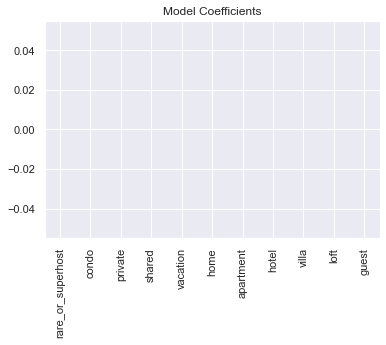

In [103]:
predictors = X_train.columns

coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

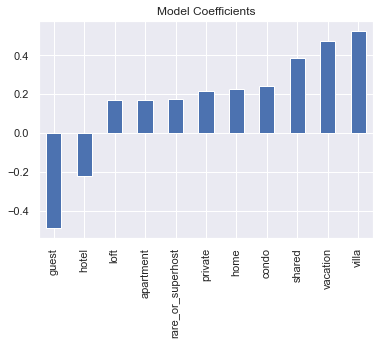

In [104]:
predictors = X_train.columns

coef = pd.Series(basic.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

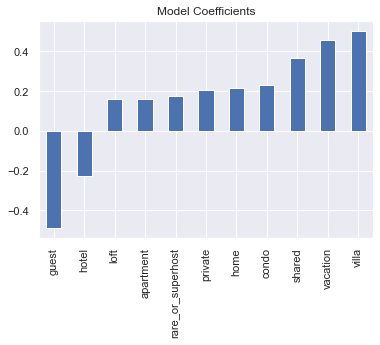

In [105]:
from sklearn.linear_model import Ridge
predictors = X_train.columns

coef = pd.Series(ridge.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
#figure out R^2 score for lasso regression

# train_score = lin_reg_est.score(X_train, y_train)
# val_score = lin_reg_est.score(X_holdout, y_holdout)

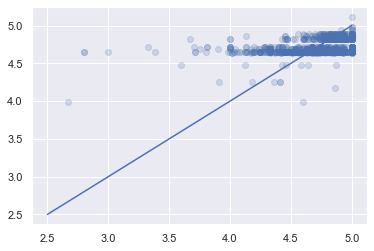

In [106]:
# Fitted vs. Actual
#lin_reg_est
y_train_pred = ridge.predict(X_train)

#y_train_pred = lasso.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([2.5, 5], [2.5, 5])

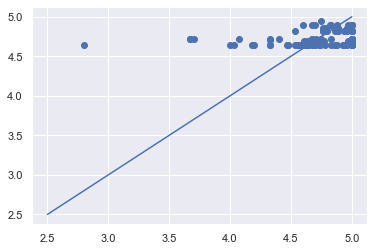

In [107]:
# Fitted vs. Actual
y_test_pred = ridge.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([2.5, 5], [2.5, 5])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [109]:
regressor = LinearRegression()  

regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
#ridge

y_pred = ridge.predict(X_test)
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_ridge.head(25)
print(df1)

      Actual  Predicted
942     4.88   4.816182
1029    4.67   4.644558
1119    5.00   4.687606
912     4.48   4.644558
452     4.60   4.818912
5       4.35   4.687606
880     5.00   4.716090
788     5.00   4.890444
14      4.77   4.687606
891     4.47   4.644558
399     5.00   4.818912
267     4.80   4.890444
1112    4.81   4.861960
667     5.00   4.716090
269     4.81   4.687606
294     4.50   4.644558
693     4.82   4.644558
52      4.48   4.644558
825     4.92   4.890444
270     4.61   4.700608
1086    4.69   4.644558
775     4.80   4.716090
869     4.67   4.687606
757     5.00   4.687606
745     4.18   4.644558


In [111]:
#normal

y_pred = regressor.predict(X_test)
df_basic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_basic.head(25)
print(df1)

      Actual  Predicted
942     4.88   4.823543
1029    4.67   4.645139
1119    5.00   4.686130
912     4.48   4.645139
452     4.60   4.830726
5       4.35   4.686130
880     5.00   4.692648
788     5.00   4.878234
14      4.77   4.686130
891     4.47   4.645139
399     5.00   4.830726
267     4.80   4.878234
1112    4.81   4.871717
667     5.00   4.692648
269     4.81   4.686130
294     4.50   4.645139
693     4.82   4.645139
52      4.48   4.645139
825     4.92   4.878234
270     4.61   4.683324
1086    4.69   4.645139
775     4.80   4.692648
869     4.67   4.686130
757     5.00   4.686130
745     4.18   4.645139


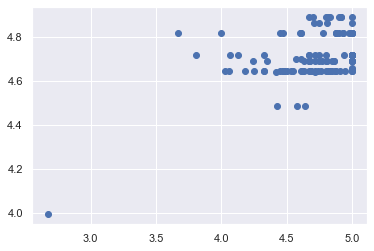

In [112]:
plt.scatter(df_ridge['Actual'], df_ridge['Predicted'])
plt.show()

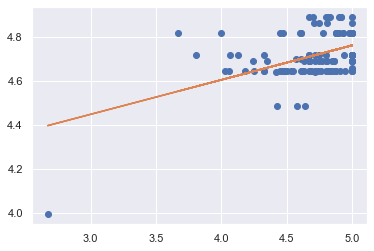

In [113]:
import matplotlib.pyplot as plt

x = df_ridge['Actual']
y = df_ridge['Predicted']
#create basic scatterplot
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

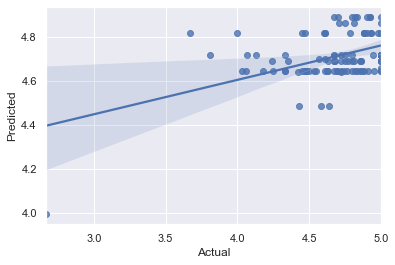

In [114]:
import seaborn as sns

sns.regplot(x, y)

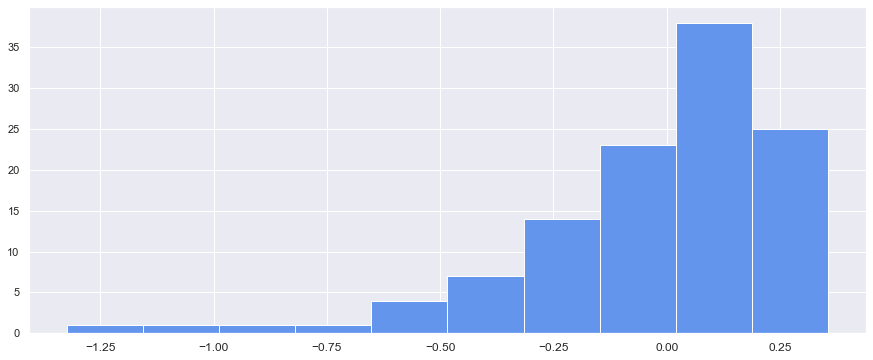

In [115]:
sns.set_theme(context="notebook", style="darkgrid")
plt.figure(clear=True, figsize=(15,6), facecolor="white")
plt.hist(x-y, color="cornflowerblue");
plt.xticks(fontsize=12)
plt.savefig("Residual hist")

In [26]:
a = master[['place', 'rating']].groupby(['place']).mean()
a = a.reset_index()

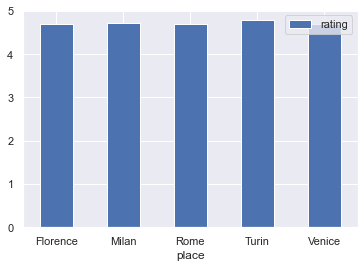

In [28]:
ax = a.plot.bar(x='place', y='rating', rot=0)